#**Predicting  NEPSE Index Price Using Deep Learning Models**

**Collaborators**:  Nawa Raj Pokhrel, Keshab Raj Dahal, Ramchandra Rimal, Hum Nath Bhandari, Binod Rimal


# **Part I:  Data Creation and Exploration**

In this module we use various financial resources to create input data of NEPSE index

In [ ]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import tensorflow as tf

import seaborn as sns
sns.set_theme(style="whitegrid")
#plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data_dir= "/content/drive/MyDrive/Nepse_Project"

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Mar 30 16:19:50 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    30W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
file = "FinalCleanedData.csv"
file = os.path.join(data_dir, file)
df = pd.read_csv(file,index_col=[0])
data=df.set_index('Date')
data.index = pd.to_datetime(data.index)
data.index.name = None

In [ ]:
data= data.iloc[:, [3, 0,1,2,4,5,6,7,8,9,10,11,12,13,14,15]]
data = data.loc['2016-07-17':'2020-01-15']
data.head(6)

,Close,Open,High,Low,Volume,MACD,RSI,ATR,MFI,CPI,USDX,IR,TB,EFFR,RMT,Score
2016-07-17,1745.74,1718.15,1749.96,1715.14,2272045,-37.509420,74.940143,23.122890,70.196510,112.9,107.519,8.6,0.44,0.82,51.94,0.20955
2016-07-18,1786.59,1745.74,1786.68,1745.74,2870497,-41.071885,82.962838,24.395540,67.197424,112.9,107.519,8.6,0.44,0.82,51.94,0.21927
2016-07-19,1800.47,1786.59,1813.42,1785.33,2902127,-44.502170,84.862752,24.659430,65.486818,112.9,107.519,8.6,0.44,0.82,51.94,-0.02642
2016-07-20,1786.84,1800.47,1813.44,1782.57,3474801,-45.595275,75.342839,25.103042,55.037084,112.9,107.519,8.6,0.44,0.82,51.94,0.15107
2016-07-21,1798.83,1786.84,1804.75,1779.71,3154492,-46.888559,77.863404,25.098539,67.326060,112.9,107.519,8.6,0.44,0.82,51.94,0.12900
2016-07-25,1838.49,1798.83,1838.59,1798.83,4740972,-50.531234,84.076158,26.145787,74.822456,112.9,107.519,8.6,0.44,0.82,51.94,0.22050


In [ ]:
output_dir_path = "/content/drive/MyDrive/Nepse_Project/Results/"

## **Visualization of Response Variable**

<Figure size 1080x288 with 0 Axes>

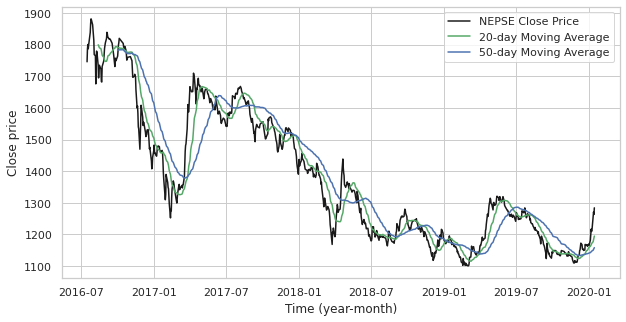

In [ ]:

df = data.copy()
fig = plt.figure(figsize = (15,4))
df['MA_20'] = df['Close'].rolling(20).mean()
df['MA_50'] = df['Close'].rolling(50).mean()
#df['MA_200'] = df['Close'].rolling(200).mean()

fig = plt.figure(figsize=(10,5))
fig.set(facecolor = "white")
plt.plot(df['Close'], 'k',label=['NEPSE Close Price'])
plt.plot(df['MA_20'],'g', label=['20-day MA'])
plt.plot(df['MA_50'],'b', label=['50-day MA'])
#plt.plot(df['MA_200'],'g', label=['200-day MA'])
plt.legend(['NEPSE Close Price', '20-day Moving Average', '50-day Moving Average'], loc='upper right')
plt.title('')
plt.xlabel('Time (year-month)')
plt.ylabel('Close price')
#sns.set_style("whitegrid")
fig.savefig(output_dir_path+'original_data_plus_moving_averages.png',dpi=600)
plt.show()

####  **Correlation heatmap**

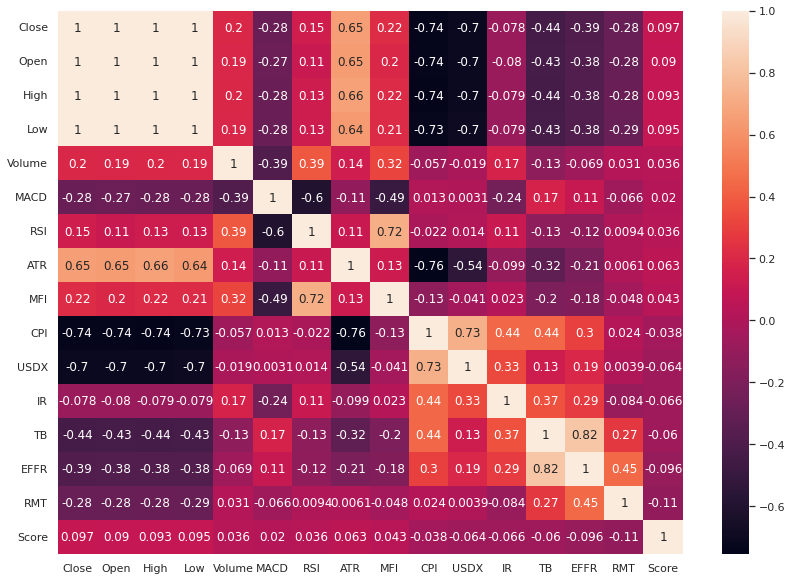

In [ ]:

fig = plt.figure(figsize= (14,10))
sns.heatmap(data.corr(), annot=True)
sns.set_style("whitegrid")

fig.savefig(output_dir_path+"correlation_heatmap.pdf",dpi=600)

In [ ]:
#data = data.iloc[:, 1:]
#fig = plt.figure(figsize= (10,5))
#sns.heatmap(data.corr(), annot=True)
#sns.set_style("whitegrid")
#fig.savefig(output_dir_path+"correlation_heatmap2.pdf",dpi=600)


<Figure size 1440x864 with 0 Axes>

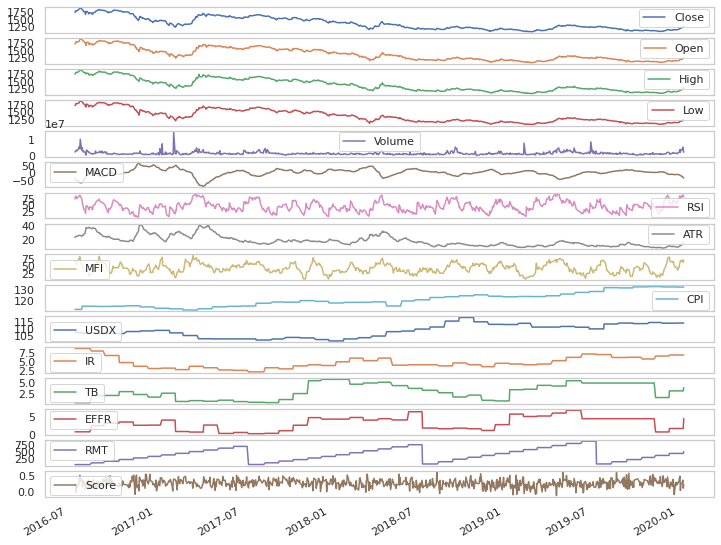

In [ ]:
fig = plt.figure(figsize = (20, 12))
#fig.axes.get_yaxis().set_visible(False)
data.plot(subplots = True, figsize = (12,10),grid=False)
sns.set_style("whitegrid")
fig.savefig(output_dir_path+"timeseries.pdf",dpi=600)
plt.show()

In [ ]:
data.describe()

,Close,Open,High,Low,Volume,MACD,RSI,ATR,MFI,CPI,USDX,IR,TB,EFFR,RMT,Score
count,827.000000,827.000000,827.000000,827.000000,8.270000e+02,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000
mean,1370.174946,1370.940121,1379.731028,1361.916433,1.502088e+06,3.910194,46.230496,18.068744,43.402364,121.437582,108.744322,4.794039,3.007062,3.163253,394.629661,0.259099
std,205.491340,205.714117,208.124840,203.373680,1.111600e+06,22.823996,19.365459,7.783779,16.516305,5.983838,4.395458,1.505360,1.746156,1.869821,226.839547,0.120377
min,1100.580000,1100.950000,1104.610000,1098.950000,1.175980e+05,-84.013197,4.915743,7.554095,5.915355,112.400000,101.744400,2.300000,0.440000,0.290000,51.940000,-0.119790
25%,1193.365000,1193.630000,1199.295000,1188.010000,8.732870e+05,-5.982711,32.742535,11.702929,31.185887,115.900000,104.045250,3.800000,1.180000,1.680000,228.950000,0.180550
50%,1300.410000,1301.390000,1315.160000,1293.770000,1.197106e+06,5.911620,43.757784,16.271469,42.801416,120.300000,108.572700,4.200000,3.000000,2.840000,376.990000,0.260800
75%,1536.820000,1537.295000,1546.685000,1527.635000,1.730374e+06,17.029824,59.178426,21.944670,55.606341,124.800000,113.051200,6.000000,4.970000,4.520000,566.970000,0.337670
max,1881.450000,1881.450000,1888.360000,1866.280000,1.541434e+07,66.304566,94.081386,41.992169,87.154385,132.820000,117.739900,8.600000,5.820000,6.910000,879.270000,0.608340


## **Denoising (We are not doing this time)**

In [ ]:
"""
from skimage.restoration import (denoise_wavelet, estimate_sigma)

data['Close']= denoise_wavelet(data.iloc[:, 0], wavelet='haar',
                                      #method='BayesShrink',
                                      method='VisuShrink',
                                      mode='soft', rescale_sigma = True)
data.head()
"""

"\nfrom skimage.restoration import (denoise_wavelet, estimate_sigma)\n\ndata['Close']= denoise_wavelet(data.iloc[:, 0], wavelet='haar',\n                                      #method='BayesShrink', \n                                      method='VisuShrink',  \n                                      mode='soft', rescale_sigma = True)\ndata.head()\n"

### **Machine learning libraries**

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Conv1D, MaxPooling2D, MaxPooling1D, Flatten
from tensorflow.keras import optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import time
import math



### **Supporting functions**

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    return (np.mean(np.abs((y_true - y_pred)/(y_true))*100)) #some issues with zero denominator

def calculate_scores(y_true, y_pred):
  rmse = math.sqrt(mean_squared_error(y_true, y_pred))
  #R2_score = r2_score(y_true, y_pred)
  R = np.corrcoef(y_true, y_pred)
  #mae = mean_absolute_error(y_true, y_pred)
  mape = mean_absolute_percentage_error(y_true, y_pred)
  #dic = {'rmse':rmse, 'R2_score': R2_score, 'R':R[0,1], 'mae': mae, 'mape': mape}
  dic = {'rmse':rmse, 'R': R[0,1], 'mape': mape}
  return (dic)



def DatasetCreation(dataset, time_step = 1):  ##defining a function that gives a dataset and a time step, which then returns the input and output data
   DataX, DataY = [], []
   for i in range(len(dataset)- time_step -1):
         a = dataset[i:(i+ time_step), ]
         DataX.append(a)
         DataY.append(dataset[i + time_step, 0]) #ydata consists close price
   return np.array(DataX), np.array(DataY)


def data_split(data, split = 0.2):
  #======= creating training and test data===#
  l1   = int(len(data) * (1- split))
  l2    = len(data) - l1
  data1  = data.iloc[0:l1,:]
  data2   = data.iloc[l1:len(data),:]
  return data1, data2

def min_max_transform(data, feature_range=(0, 1)):
   scaler = MinMaxScaler(feature_range)
   return scaler.fit_transform(data)

def min_max_inverse_transform(data_scaled, min_original, max_original):
    return min_original +  data_scaled*(max_original - min_original)



def write_dic_to_file(dic_name, file_name):
  file = open(file_name, 'w')
  file.write(str(dic_name))
  file.close()

import ast
def read_dic_from_file(file_name):
  file = open(file_name, "r")
  contents = file.read()
  dictionary = ast.literal_eval(contents)
  file.close()
  return dictionary



#**Building Deep Learning Models**

## **Model 1: Build and Compile LSTM Model**

In [ ]:
def Build_LSTM_Model(layers, time_step, num_features, optimizer = 'Adam', learning_rate = 0.001, verbose = 1):

  model = Sequential()

  for i in range(len(layers)):
    if len(layers)==1:
      model.add(LSTM(np.int(layers[i]), input_shape = (time_step, num_features)))
    else:
      if i < len(layers)-1:
        if i == 0:
          model.add(LSTM(np.int(layers[i]), input_shape=(time_step, num_features), return_sequences= True))
          #model.add(Dropout(0.10))
        else:
          model.add(LSTM(np.int(layers[i]), return_sequences=True))
          #model.add(Dropout(0.10))
      else:
        model.add(LSTM(np.int(layers[i])))
        #model.add(Dropout(0.10))


  model.add(Dense(1, activation = 'linear'))

  if optimizer == 'Adam':
    opt = optimizers.Adam(learning_rate = learning_rate)
  elif optimizer == 'Adagrad':
    opt = optimizers.Adagrad(learning_rate = learning_rate)
  elif optimizer == 'Nadam':
    opt = optimizers.Nadam(learning_rate = learning_rate)
  elif optimizer == 'Adadelta':
    opt = optimizers.Adadelta(learning_rate= learning_rate)
  elif optimizer == 'RMSprop':
    opt = optimizers.RMSprop(learning_rate= learning_rate)
  else:
    print("No optimizer found in the list(['Adam', 'Adagrad','Nadam', 'Adadelta', 'RMSprop'])! Please apply your optimizer manually...")

  model.compile(loss='mean_squared_error', optimizer= opt)

  if verbose == 1:
    print(model.summary())
  return model

### **Testing**

In [ ]:
optimizers_names = ['Adam', 'Adagrad', 'Nadam']
time_step = 5
num_features = 10
learning_rate = 0.001
verbose = 1
layers = [50,20]

Build_LSTM_Model(layers, time_step, num_features, optimizer =  optimizers_names[0], learning_rate= learning_rate, verbose = verbose)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 50)             12200     
                                                                 
 lstm_1 (LSTM)               (None, 20)                5680      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 17,901
Trainable params: 17,901
Non-trainable params: 0
_________________________________________________________________
None


## **Model 2: Build and Compile GRU Model**

In [ ]:
def Build_GRU_Model(layers, time_step, num_features, optimizer = 'Adam', learning_rate = 0.001, verbose = 1):

  model = Sequential()

  for i in range(len(layers)):
    if len(layers)==1:
      model.add(GRU(np.int(layers[i]), input_shape = (time_step, num_features)))
    else:
      if i < len(layers)-1:
        if i == 0:
          model.add(GRU(np.int(layers[i]), input_shape=(time_step, num_features), return_sequences= True))
          #model.add(Dropout(0.10))
        else:
          model.add(GRU(np.int(layers[i]), return_sequences=True))
          #model.add(Dropout(0.10))
      else:
        model.add(GRU(np.int(layers[i])))
        #model.add(Dropout(0.10))
  model.add(Dense(1, activation = 'linear'))

  if optimizer == 'Adam':
    opt = optimizers.Adam(learning_rate = learning_rate)
  elif optimizer == 'Adagrad':
    opt = optimizers.Adagrad(learning_rate = learning_rate)
  elif optimizer == 'Nadam':
    opt = optimizers.Nadam(learning_rate = learning_rate)
  elif optimizer == 'Adadelta':
    opt = optimizers.Adadelta(learning_rate= learning_rate)
  elif optimizer == 'RMSprop':
    opt = optimizers.RMSprop(learning_rate= learning_rate)
  else:
    print("No optimizer found in the list(['Adam', 'Adagrad','Nadam', 'Adadelta', 'RMSprop'])! Please apply your optimizer manually...")

  model.compile(loss='mean_squared_error', optimizer= opt)

  if verbose == 1:
    print(model.summary())
  return model

### **Testing**

In [ ]:
optimizers_names = ['Adam', 'Adagrad', 'Nadam']
time_step = 5
num_features = 9
learning_rate = 0.001
verbose = 1
layers = [50,20]

Build_GRU_Model(layers, time_step, num_features, optimizer =  optimizers_names[0], learning_rate= learning_rate, verbose = verbose)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 5, 50)             9150      
                                                                 
 gru_1 (GRU)                 (None, 20)                4320      
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 13,491
Trainable params: 13,491
Non-trainable params: 0
_________________________________________________________________
None


## **Model 3: Build and Compile CNN Model**

In [ ]:
"""
def Build_CNN_Model(conv_layers, kernel_size, max_pool_size, time_step, num_features, optimizer = 'Adam', learning_rate = 0.001, verbose = 1):

  model = Sequential()

  for i in range(len(conv_layers)):

    if len(conv_layers)==1:
      model.add(Conv2D(conv_layers[i], kernel_size, activation='relu', strides = 1, padding = 'valid', input_shape = (time_step, num_features, 1))) # valid means no padding
      model.add(MaxPooling2D(max_pool_size,  strides = 2))

    else:
      if i == 0:
        model.add(Conv2D(conv_layers[i], kernel_size, activation= 'relu', strides = 1, padding = 'valid', input_shape = (time_step, num_features, 1))) # valid means no padding
        model.add(MaxPooling2D(max_pool_size,  strides = 2))
      else:
        model.add(Conv2D(conv_layers[i], kernel_size, activation= 'relu', strides = 1, padding = 'valid')) # valid means no padding
        model.add(MaxPooling2D(max_pool_size,  strides = 2))


  model.add(Flatten())

  model.add(Dense(50, activation='relu'))
  model.add(Dense(1, activation = 'linear')) #fully connected layer

  if optimizer == 'Adam':
    opt = optimizers.Adam(learning_rate = learning_rate)
  elif optimizer == 'Adagrad':
    opt = optimizers.Adagrad(learning_rate = learning_rate)
  elif optimizer == 'Nadam':
    opt = optimizers.Nadam(learning_rate = learning_rate)
  elif optimizer == 'Adadelta':
    opt = optimizers.Adadelta(learning_rate= learning_rate)
  elif optimizer == 'RMSprop':
    opt = optimizers.RMSprop(learning_rate= learning_rate)
  else:
    print("No optimizer found in the list(['Adam', 'Adagrad','Nadam', 'Adadelta', 'RMSprop'])! Please apply your optimizer manually...")

  model.compile(loss='mean_squared_error', optimizer= opt)

  if verbose == 1:
    print(model.summary())
  return model

"""

'\ndef Build_CNN_Model(conv_layers, kernel_size, max_pool_size, time_step, num_features, optimizer = \'Adam\', learning_rate = 0.001, verbose = 1):\n  \n  model = Sequential()\n    \n  for i in range(len(conv_layers)):\n    \n    if len(conv_layers)==1:\n      model.add(Conv2D(conv_layers[i], kernel_size, activation=\'relu\', strides = 1, padding = \'valid\', input_shape = (time_step, num_features, 1))) # valid means no padding\n      model.add(MaxPooling2D(max_pool_size,  strides = 2))\n\n    else:\n      if i == 0:\n        model.add(Conv2D(conv_layers[i], kernel_size, activation= \'relu\', strides = 1, padding = \'valid\', input_shape = (time_step, num_features, 1))) # valid means no padding\n        model.add(MaxPooling2D(max_pool_size,  strides = 2))\n      else:\n        model.add(Conv2D(conv_layers[i], kernel_size, activation= \'relu\', strides = 1, padding = \'valid\')) # valid means no padding\n        model.add(MaxPooling2D(max_pool_size,  strides = 2))\n\n\n  model.add(Flatt

In [ ]:
"""
optimizers_names = ['Adam', 'Adagrad', 'Nadam']
time_step = 5
num_features = 9
learning_rate = 0.001
verbose = 1
conv_layers = [64]

kernel_size =  (2, num_features)

max_pool_size = (2, 1)

Build_CNN_Model(conv_layers, kernel_size , max_pool_size, time_step, num_features, optimizer =  optimizers_names[0], learning_rate= learning_rate, verbose = verbose)
"""

"\noptimizers_names = ['Adam', 'Adagrad', 'Nadam']\ntime_step = 5\nnum_features = 9\nlearning_rate = 0.001\nverbose = 1\nconv_layers = [64]\n\nkernel_size =  (2, num_features)\n\nmax_pool_size = (2, 1)\n\nBuild_CNN_Model(conv_layers, kernel_size , max_pool_size, time_step, num_features, optimizer =  optimizers_names[0], learning_rate= learning_rate, verbose = verbose)\n"

# **CNN 1D**

In [ ]:
def Build_CNN_Model(conv_layers, kernel_size, max_pool_size, time_step, num_features, optimizer = 'Adam', learning_rate = 0.001, verbose = 1):

  model = Sequential()

  for i in range(len(conv_layers)):

    if len(conv_layers)==1:
      model.add(Conv1D(conv_layers[i], kernel_size, activation='relu', strides = 1, padding = 'valid', input_shape = (time_step, num_features))) # valid means no padding
      model.add(MaxPooling1D(max_pool_size,  strides = 2))

    else:
      if i == 0:
        model.add(Conv1D(conv_layers[i], kernel_size, activation= 'relu', strides = 1, padding = 'valid', input_shape = (time_step, num_features))) # valid means no padding
        model.add(MaxPooling1D(max_pool_size,  strides = 2))
      else:
        model.add(Conv1D(conv_layers[i], kernel_size, activation= 'relu', strides = 1, padding = 'valid')) # valid means no padding
        model.add(MaxPooling1D(max_pool_size,  strides = 2))


  model.add(Flatten())

  model.add(Dense(20, activation='relu'))
  model.add(Dense(1, activation = 'linear')) #fully connected layer

  if optimizer == 'Adam':
    opt = optimizers.Adam(learning_rate = learning_rate)
  elif optimizer == 'Adagrad':
    opt = optimizers.Adagrad(learning_rate = learning_rate)
  elif optimizer == 'Nadam':
    opt = optimizers.Nadam(learning_rate = learning_rate)
  elif optimizer == 'Adadelta':
    opt = optimizers.Adadelta(learning_rate= learning_rate)
  elif optimizer == 'RMSprop':
    opt = optimizers.RMSprop(learning_rate= learning_rate)
  else:
    print("No optimizer found in the list(['Adam', 'Adagrad','Nadam', 'Adadelta', 'RMSprop'])! Please apply your optimizer manually...")

  model.compile(loss='mean_squared_error', optimizer= opt)

  if verbose == 1:
    print(model.summary())
  return model


### **Testing**

In [ ]:
optimizers_names = ['Adam', 'Adagrad', 'Nadam']
time_step = 5
num_features = 9
learning_rate = 0.001
verbose = 1
conv_layers = [64]

kernel_size =  2

max_pool_size = 2

Build_CNN_Model(conv_layers, kernel_size , max_pool_size, time_step, num_features, optimizer =  optimizers_names[0], learning_rate= learning_rate, verbose = verbose)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             1216      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 20)                2580      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 3,817
Trainable params: 3,817
Non-trainable params: 0
____________________________________________________

# **Tuning Hyperparameters of Deep Learning Models**

## **Model 1: Tuning Hyper Parameters of LSTM Model**

In [ ]:
def LSTM_Hyper_Parameter_Tuning(layers, data, time_step, split, optimizers_names, learning_rates, batch_sizes, epochs, num_replicates = 2):
  #======= creating training and test data===#
  train_data, val_data = data_split(data, split)

  num_features = train_data.shape[1]

  min_train, max_train  = train_data["Close"].min(), train_data["Close"].max()
  min_val, max_val   =    val_data["Close"].min(), val_data["Close"].max()

  train_data_scaled  =  min_max_transform(train_data)
  val_data_scaled    = min_max_transform(val_data)

  X_train, y_train =   DatasetCreation(train_data_scaled, time_step)
  X_val, y_val     =   DatasetCreation(val_data_scaled, time_step)

  #========dealing with time series=========#

  best_avg_rmse = 99999999999

  collect_rmse = []

  all_avg_rmse = np.zeros((len(optimizers_names), len(learning_rates), len(batch_sizes)))

  best_hyper_parameters = {"model": layers, "optimizer": None, "learning_rate": None, "batch_size": None,"best_avg_rmse": None}

  #hist_csv_file = 'model_history'+ str(time.time())+'.csv'

  for opt in range(len(optimizers_names)):

    for lr in range(len(learning_rates)):

      for batch_size in range(len(batch_sizes)):

        for i in range(num_replicates):

          print("Running for " + optimizers_names[opt] + " optimizer " + str(learning_rates[lr]) +  " learning_rate " +  str(batch_sizes[batch_size]) + " batch_size and " + str(i) +  " replicate " +  "\n")

          model = Build_LSTM_Model(layers, time_step, num_features, optimizers_names[opt], learning_rate = learning_rates[lr], verbose = 0)

          callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience= 5)

          history = model.fit(X_train, y_train, batch_size = batch_sizes[batch_size], epochs= epochs, validation_data = (X_val, y_val), callbacks=[callback], verbose = 1)

          #hist_df = pd.DataFrame(history.history)
          #hist_df.to_csv("history")
          #with open("hist_csv_file.csv", mode='w') as f:
          #  hist_df.to_csv(f)

          #==============Making predictions in original scale ==========
          #train_pred  =  min_max_inverse_transform(model.predict(X_train).ravel(), min_train, max_train)
          val_pred    =  min_max_inverse_transform(model.predict(X_val).ravel(), min_val, max_val)

          #train_scores =  calculate_scores(min_max_inverse_transform(y_train, min_train, max_train),train_pred)
          #scores =   calculate_scores(min_max_inverse_transform(y_val, min_val, max_val),val_pred)

          collect_rmse.append(math.sqrt(mean_squared_error(min_max_inverse_transform(y_val, min_val, max_val),val_pred)))

        avg_rmse = np.mean(np.array(collect_rmse))
        all_avg_rmse[opt][lr][batch_size] = avg_rmse

        if avg_rmse < best_avg_rmse:
          best_avg_rmse = avg_rmse
          best_hyper_parameters = {"model": layers,  "optimizer": optimizers_names[opt], "learning_rate": learning_rates[lr], "batch_size": batch_sizes[batch_size], "best_avg_rmse": best_avg_rmse}


  output_dictionary = {
      "best_hyper_parameters":  best_hyper_parameters,
      "all_avg_rmse": all_avg_rmse
       }

  #writing output dictionary in the file

  file_name = output_dir_path+ "lstm-" + str(layers[0])+ "N-hyperparameter_tuning__results" + ".txt"
  write_dic_to_file(output_dictionary, file_name)

  print("Best_hyper_parameters(LSTM): \n", output_dictionary['best_hyper_parameters'])
  print("all_avg_rmse(LSTM): \n", output_dictionary['all_avg_rmse'])

  return output_dictionary['best_hyper_parameters']



### **Testing**

In [ ]:
'''
layers = [10]
time_step = 5
optimizers_names = ['Adam', 'Adagrad', 'Nadam']
#optimizers_names = ['Adam']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 3
num_replicates = 2
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

lstm_N10_best_hyper_parameters = LSTM_Hyper_Parameter_Tuning(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)
lstm_N10_best_hyper_parameters
'''

"\nlayers = [10]\ntime_step = 5\noptimizers_names = ['Adam', 'Adagrad', 'Nadam']\n#optimizers_names = ['Adam']\nlearning_rates =  [0.1, 0.01, 0.001]\nbatch_sizes =  [4, 8, 16]\nepochs = 3\nnum_replicates = 2\ntest_split = 0.2 \nval_split = 0.2\n\ntrain_data, test_data = data_split(data, test_split)\n\nlstm_N10_best_hyper_parameters = LSTM_Hyper_Parameter_Tuning(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)\nlstm_N10_best_hyper_parameters\n"

## **Model 2: Tuning Hyperparameters of GRU Model**

In [ ]:
def GRU_Hyper_Parameter_Tuning(layers, data, time_step, split, optimizers_names, learning_rates, batch_sizes, epochs, num_replicates = 2):
  #======= creating training and test data===#
  train_data, val_data = data_split(data, split)

  num_features = train_data.shape[1]

  min_train, max_train  = train_data["Close"].min(), train_data["Close"].max()
  min_val, max_val   =    val_data["Close"].min(), val_data["Close"].max()

  train_data_scaled  =  min_max_transform(train_data)
  val_data_scaled    = min_max_transform(val_data)

  X_train, y_train =   DatasetCreation(train_data_scaled, time_step)
  X_val, y_val     =   DatasetCreation(val_data_scaled, time_step)

  #========dealing with time series=========#

  best_avg_rmse = 99999999999

  collect_rmse = []

  all_avg_rmse = np.zeros((len(optimizers_names), len(learning_rates), len(batch_sizes)))

  best_hyper_parameters = {"model": layers, "optimizer": None, "learning_rate": None, "batch_size": None,"best_avg_rmse": None}

  #hist_csv_file = 'model_history'+ str(time.time())+'.csv'

  for opt in range(len(optimizers_names)):

    for lr in range(len(learning_rates)):

      for batch_size in range(len(batch_sizes)):

        for i in range(num_replicates):

          print("Running for " + optimizers_names[opt] + " optimizer " + str(learning_rates[lr]) +  " learning_rate " +  str(batch_sizes[batch_size]) + " batch_size and " + str(i) +  " replicate " +  "\n")

          model = Build_GRU_Model(layers, time_step, num_features, optimizers_names[opt], learning_rate = learning_rates[lr], verbose = 0)

          callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience= 5)

          history = model.fit(X_train, y_train, batch_size = batch_sizes[batch_size], epochs= epochs, validation_data = (X_val, y_val), callbacks=[callback], verbose = 1)

          #hist_df = pd.DataFrame(history.history)
          #hist_df.to_csv("history")
          #with open("hist_csv_file.csv", mode='w') as f:
          #  hist_df.to_csv(f)

          #==============Making predictions in original scale ==========
          #train_pred  =  min_max_inverse_transform(model.predict(X_train).ravel(), min_train, max_train)
          val_pred    =  min_max_inverse_transform(model.predict(X_val).ravel(), min_val, max_val)

          #train_scores =  calculate_scores(min_max_inverse_transform(y_train, min_train, max_train),train_pred)
          #scores =   calculate_scores(min_max_inverse_transform(y_val, min_val, max_val),val_pred)

          collect_rmse.append(math.sqrt(mean_squared_error(min_max_inverse_transform(y_val, min_val, max_val),val_pred)))

        avg_rmse = np.mean(np.array(collect_rmse))
        all_avg_rmse[opt][lr][batch_size] = avg_rmse

        if avg_rmse < best_avg_rmse:
          best_avg_rmse = avg_rmse
          best_hyper_parameters = {"model": layers,  "optimizer": optimizers_names[opt], "learning_rate": learning_rates[lr], "batch_size": batch_sizes[batch_size], "best_avg_rmse": best_avg_rmse}


  output_dictionary = {
      "best_hyper_parameters":  best_hyper_parameters,
      "all_avg_rmse": all_avg_rmse
       }

  #writing output dictionary in the file

  file_name = output_dir_path+ "gru-" + str(layers[0])+ "N-hyperparameter_tuning__results" + ".txt"
  write_dic_to_file(output_dictionary, file_name)

  print("Best_hyper_parameters(GRU): \n", output_dictionary['best_hyper_parameters'])
  print("all_avg_rmse(GRU): \n", output_dictionary['all_avg_rmse'])

  return output_dictionary['best_hyper_parameters']



### **Testing**

## **Case I: 10N-GRU**

In [ ]:
layers = [10]
time_step = 5
optimizers_names = ['Adam', 'Adagrad', 'Nadam']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 50
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

gru_N10_best_hyper_parameters = GRU_Hyper_Parameter_Tuning(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)
gru_N10_best_hyper_parameters


## **Case II: 30N-GRU**

In [ ]:
layers = [30]
time_step = 5
optimizers_names = ['Adam', 'Adagrad', 'Nadam']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 50
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

gru_N30_best_hyper_parameters = GRU_Hyper_Parameter_Tuning(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)
gru_N30_best_hyper_parameters


## **Case III: 50N-GRU**


In [ ]:
layers = [50]
time_step = 5
optimizers_names = ['Adam', 'Adagrad', 'Nadam']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 50
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

gru_N50_best_hyper_parameters = GRU_Hyper_Parameter_Tuning(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)
gru_N50_best_hyper_parameters


## **Case IV: 100N-GRU**

In [ ]:
layers = [100]
time_step = 5
optimizers_names = ['Adam', 'Adagrad', 'Nadam']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 50
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

gru_N100_best_hyper_parameters = GRU_Hyper_Parameter_Tuning(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)
gru_N100_best_hyper_parameters


## **Case V: 150N-GRU**

In [ ]:
layers = [150]
time_step = 5
optimizers_names = ['Adam', 'Adagrad', 'Nadam']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 50
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

gru_N150_best_hyper_parameters = GRU_Hyper_Parameter_Tuning(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)
gru_N150_best_hyper_parameters



## **Case VI: 200N-GRU**

In [ ]:
layers = [200]
time_step = 5
optimizers_names = ['Adam', 'Adagrad', 'Nadam']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 50
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

gru_N200_best_hyper_parameters = GRU_Hyper_Parameter_Tuning(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)
gru_N200_best_hyper_parameters


## **Case VII : 250N-GRU**

In [ ]:
layers = [250]
time_step = 5
optimizers_names = ['Adam', 'Adagrad', 'Nadam']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 50
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

gru_N250_best_hyper_parameters = GRU_Hyper_Parameter_Tuning(layers, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)
gru_N250_best_hyper_parameters


## **Model 3: Tuning Hyperparameters of CNN Model**

In [ ]:
def CNN_Hyper_Parameter_Tuning(conv_layers, kernel_size, max_pool_shape, data, time_step, split, optimizers_names, learning_rates, batch_sizes, epochs, num_replicates = 2):
  #======= creating training and test data===#
  train_data, val_data = data_split(data, split)

  num_features = train_data.shape[1]

  min_train, max_train  = train_data["Close"].min(), train_data["Close"].max()
  min_val, max_val   =    val_data["Close"].min(), val_data["Close"].max()

  train_data_scaled  =  min_max_transform(train_data)
  val_data_scaled    = min_max_transform(val_data)

  X_train, y_train =   DatasetCreation(train_data_scaled, time_step)
  X_val, y_val     =   DatasetCreation(val_data_scaled, time_step)

  #========dealing with time series=========#

  best_avg_rmse = 99999999999

  collect_rmse = []

  all_avg_rmse = np.zeros((len(optimizers_names), len(learning_rates), len(batch_sizes)))

  best_hyper_parameters = {"model": conv_layers, "max_pool_shape": None, "optimizer": None, "learning_rate": None, "batch_size": None,"best_avg_rmse": None}

  #hist_csv_file = 'model_history'+ str(time.time())+'.csv'

  for opt in range(len(optimizers_names)):

    for lr in range(len(learning_rates)):

      for batch_size in range(len(batch_sizes)):

        for i in range(num_replicates):

          print("Running for " + optimizers_names[opt] + " optimizer " + str(learning_rates[lr]) +  " learning_rate " +  str(batch_sizes[batch_size]) + " batch_size and " + str(i) +  " replicate " +  "\n")

          model = Build_CNN_Model(conv_layers, kernel_size, max_pool_shape, time_step, num_features, optimizers_names[opt], learning_rate = learning_rates[lr], verbose = 0)

          callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience= 5)

          history = model.fit(X_train, y_train, batch_size = batch_sizes[batch_size], epochs= epochs, validation_data = (X_val, y_val), callbacks=[callback], verbose = 1)

          #hist_df = pd.DataFrame(history.history)
          #hist_df.to_csv("history")
          #with open("hist_csv_file.csv", mode='w') as f:
          #  hist_df.to_csv(f)

          #==============Making predictions in original scale ==========
          #train_pred  =  min_max_inverse_transform(model.predict(X_train).ravel(), min_train, max_train)
          val_pred    =  min_max_inverse_transform(model.predict(X_val).ravel(), min_val, max_val)

          #train_scores =  calculate_scores(min_max_inverse_transform(y_train, min_train, max_train),train_pred)
          #scores =   calculate_scores(min_max_inverse_transform(y_val, min_val, max_val),val_pred)

          collect_rmse.append(math.sqrt(mean_squared_error(min_max_inverse_transform(y_val, min_val, max_val),val_pred)))

        avg_rmse = np.mean(np.array(collect_rmse))
        all_avg_rmse[opt][lr][batch_size] = avg_rmse

        if avg_rmse < best_avg_rmse:
          best_avg_rmse = avg_rmse
          best_hyper_parameters = {"model": conv_layers, "max_pool_shape": max_pool_shape, "optimizer": optimizers_names[opt], "learning_rate": learning_rates[lr], "batch_size": batch_sizes[batch_size], "best_avg_rmse": best_avg_rmse}


  output_dictionary = {
      "best_hyper_parameters":  best_hyper_parameters,
      "all_avg_rmse": all_avg_rmse
       }

  #writing output dictionary in the file

  file_name = output_dir_path+ "cnn-" + str(layers[0])+ "N-hyperparameter_tuning__results" + ".txt"
  write_dic_to_file(output_dictionary, file_name)

  print("Best_hyper_parameters(CNN): \n", output_dictionary['best_hyper_parameters'])
  print("all_avg_rmse(CNN): \n", output_dictionary['all_avg_rmse'])

  return output_dictionary['best_hyper_parameters']



# **Case I: 10N-CNN**



In [ ]:
conv_layers = [10]
kernel_size =  2
max_pool_size = 2
time_step = 5
optimizers_names = ['Adam', 'Adagrad', 'Nadam']
#optimizers_names = ['Adam']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 50
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

cnn_N10_best_hyper_parameters = CNN_Hyper_Parameter_Tuning(conv_layers, kernel_size, max_pool_size, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)
cnn_N10_best_hyper_parameters



# **Case II: 30N-CNN**


In [ ]:
conv_layers = [30]
kernel_size =  2
max_pool_size = 2
time_step = 5
optimizers_names = ['Adam', 'Adagrad', 'Nadam']
#optimizers_names = ['Adam']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 50
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

cnn_N30_best_hyper_parameters = CNN_Hyper_Parameter_Tuning(conv_layers, kernel_size, max_pool_size, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)
cnn_N30_best_hyper_parameters


#**Case II: 50N-CNN**

In [ ]:
conv_layers = [50]
kernel_size = 2
max_pool_size = 2
time_step = 5
optimizers_names = ['Adam', 'Adagrad', 'Nadam']
#optimizers_names = ['Adam']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 50
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

cnn_N50_best_hyper_parameters = CNN_Hyper_Parameter_Tuning(conv_layers, kernel_size, max_pool_size, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)
cnn_N50_best_hyper_parameters

# **Case III: 100N-CNN**

In [ ]:
conv_layers = [100]
kernel_size =  2
max_pool_size = 2
optimizers_names = ['Adam', 'Adagrad', 'Nadam']
#optimizers_names = ['Adam']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 50
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

cnn_N100_best_hyper_parameters = CNN_Hyper_Parameter_Tuning(conv_layers, kernel_size, max_pool_size, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)
cnn_N100_best_hyper_parameters

# **CaseIV: 150N-CNN**

In [ ]:
conv_layers = [150]
kernel_size =  2
max_pool_size = 2
time_step = 5
optimizers_names = ['Adam', 'Adagrad', 'Nadam']
#optimizers_names = ['Adam']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 50
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

cnn_N150_best_hyper_parameters = CNN_Hyper_Parameter_Tuning(conv_layers, kernel_size, max_pool_size, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)
cnn_N150_best_hyper_parameters

# **Case VI: 200N-CNN**

In [ ]:
conv_layers = [200]
kernel_size =  2
max_pool_size = 2
time_step = 5
optimizers_names = ['Adam', 'Adagrad', 'Nadam']
#optimizers_names = ['Adam']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 50
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

cnn_N200_best_hyper_parameters = CNN_Hyper_Parameter_Tuning(conv_layers, kernel_size, max_pool_size, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)
cnn_N200_best_hyper_parameters

## **Case VII: 250-CNN**

In [ ]:
conv_layers = [250]
kernel_size =  2
max_pool_size = 2
time_step = 5
optimizers_names = ['Adam', 'Adagrad', 'Nadam']
#optimizers_names = ['Adam']
learning_rates =  [0.1, 0.01, 0.001]
batch_sizes =  [4, 8, 16]
epochs = 50
num_replicates = 10
test_split = 0.2
val_split = 0.2

train_data, test_data = data_split(data, test_split)

cnn_N250_best_hyper_parameters = CNN_Hyper_Parameter_Tuning(conv_layers, kernel_size, max_pool_size, train_data, time_step, val_split, optimizers_names, learning_rates, batch_sizes, epochs = epochs, num_replicates = num_replicates)
cnn_N250_best_hyper_parameters

# **Implementing Deep Learning Models**

## **Model 1: Implementing LSTM Model**

In [ ]:

def LSTM_Model(layers, hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 5,  num_replicates = 2):
    #====== data transformation==========#
    print("Progress: Performing data preparation steps.......\n")

    #======= creating training and test data===#

    train_data, test_data = data_split(data, test_split)

    num_features = train_data.shape[1]

    min_train, max_train  = train_data["Close"].min(), train_data["Close"].max()
    min_test, max_test   =  test_data["Close"].min(), test_data["Close"].max()

    train_data_scaled  =  min_max_transform(train_data)
    test_data_scaled   = min_max_transform(test_data)


    X_train, y_train  =   DatasetCreation(train_data_scaled, time_step)
    X_test, y_test    =   DatasetCreation(test_data_scaled, time_step)

    y_train_original  =  min_max_inverse_transform(y_train, min_train, max_train) #in original scale
    y_test_original  =  min_max_inverse_transform(y_test, min_test, max_test) #in original scale


    #============ arrays for collecting test scores ================#
    rmse_array = np.zeros(num_replicates)
    mape_array = np.zeros(num_replicates)
    R_array    = np.zeros(num_replicates)
    elapsed_time_array = np.zeros(num_replicates)

    models_history = []
    train_predictions = []
    test_predictions = []

    for i in range(num_replicates):

      print("Program is running for %d replicate ----->\n" %i)

      model = Build_LSTM_Model(layers, time_step, num_features, optimizer = hyper_parameters[0], learning_rate = hyper_parameters[1], verbose = 0)
      callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience= 5)
      # This callback will stop the training when there is no improvement in
      # the loss for three consecutive epochs
      start = time.time()
      history = model.fit(X_train, y_train, batch_size = hyper_parameters[2], epochs= epochs, callbacks=[callback], verbose = 1)
      end = time.time()
      elapsed_time = end - start

      models_history.append(history)


      #==============Making train and test prediction in original scales ==========
      train_pred   =  min_max_inverse_transform(model.predict(X_train).ravel(), min_train, max_train) #in original scale
      test_pred    =  min_max_inverse_transform(model.predict(X_test).ravel(), min_test, max_test)

      train_predictions.append(train_pred)
      test_predictions.append(test_pred)

      #============== Calculating performance scores==========
      #train_scores =  calculate_scores(min_max_inverse_transform(y_train, min_train, max_train),train_pred)
      scores =   calculate_scores(min_max_inverse_transform(y_test, min_test, max_test),test_pred)

      rmse_array[i] =  scores['rmse']
      mape_array[i] =  scores['mape']
      R_array[i] = scores['R']
      elapsed_time_array[i] = elapsed_time

    min_index = rmse_array.argmin()
    best_rmse = rmse_array[min_index]
    mape_with_best_rmse = mape_array[min_index]
    R_with_best_rmse =  R_array[min_index]
    elapsed_time_with_best_rmse = elapsed_time_array[min_index]

    train_predictions_with_best_rmse = train_predictions[min_index]
    test_predictions_with_best_rmse = test_predictions[min_index]

    loss_with_best_rmse = models_history[min_index].history['loss']

    #val_loss_with_best_rmse = models_history[min_index].history['val_loss']


    # Collecting important results========
    performance_metrics =  {

                        'scores': {'rmse': rmse_array,
                                    'mape': mape_array,
                                    'R': R_array,
                                    'elapsed_time': elapsed_time_array
                                    },

                        'minimums': {'rmse': np.min(rmse_array),
                                      'mape': np.min(mape_array),
                                      'R': np.min(R_array),
                                      'elapsed_time': np.min(elapsed_time_array)
                                      },

                        'avg_scores':  {'rmse': np.mean(rmse_array),
                                        'mape': np.mean(mape_array),
                                        'R': np.mean(R_array),
                                        'elapsed_time': np.mean(elapsed_time_array)
                                        },

                          'stds':      { 'rmse': np.std(rmse_array),
                                          'mape': np.std(mape_array),
                                          'R': np.std(R_array),
                                          'elapsed_time': np.std(elapsed_time_array)
                                        },

                        'maximums': {'rmse': np.max(rmse_array),
                                     'mape': np.max(mape_array),
                                     'R': np.max(R_array),
                                     'elapsed_time': np.max(elapsed_time_array)
                                     }

                  }




    model_with_best_rmse = {

                            'replicate': min_index,
                            'rmse': best_rmse,
                            #'mae': mae_with_best_rmse,
                            'mape': mape_with_best_rmse,
                            #'R2': R2_with_best_rmse,
                            'R':  R_with_best_rmse,
                            'elapsed_time': elapsed_time_with_best_rmse,
                            'train_predictions':train_predictions_with_best_rmse,
                            'test_predictions': test_predictions_with_best_rmse,
                            #'y_train':y_train_original,
                            #'y_test': y_test_original,
                            'loss':loss_with_best_rmse,
                             #'val_loss': val_loss_with_best_rmse
                            }

     #======= Collecting hyperparameters=============#
    hyper_parameters = {'layers': layers,
                        'model_specific_hyper_parameters': hyper_parameters,#additional best_hyper_parmeters for each models
                       'epochs': epochs,
                       'time_step':time_step,
                       'num_replicates': num_replicates,
                       'test_split':test_split
                        }


     #======= Collecting all the outputs together =============#
    output_dictionary = {'hyper_parameters': hyper_parameters,
                        'performance_metrics': performance_metrics,
                         'best_model': model_with_best_rmse,
                       }


    #Save all scores in a file for statistical study
    #pd.DataFrame(performance_metrics['scores']['rmse']).to_csv(output_dir_path+'lstm-'+ str(layers)+'-rmse.csv')
    #pd.DataFrame(performance_metrics['scores']['mape']).to_csv(output_dir_path+'lstm-'+ str(layers)+'-mape.csv')
    #pd.DataFrame(performance_metrics['scores']['R']).to_csv(output_dir_path+'lstm-'+ str(layers)+'-R.csv')



    #Save data sets

    pd.DataFrame(y_train_original).to_csv(output_dir_path+'y_train.csv')
    pd.DataFrame(y_test_original).to_csv(output_dir_path+'y_test.csv')

    #Save best model results

    #pd.DataFrame(model_with_best_rmse['train_predictions']).to_csv(output_dir_path+'best-lstm-'+ str(layers)+'-train_predictions.csv')
    #pd.DataFrame(model_with_best_rmse['test_predictions']).to_csv(output_dir_path +'best-lstm-'+ str(layers)+'-test_predictions.csv')
    #pd.DataFrame(model_with_best_rmse['loss']).to_csv(output_dir_path+ 'best-lstm-'+ str(layers)+'-loss.csv')

    #model_with_best_rmse['val_loss'].to_csv(output_dir_path+'best-lstm-model-val-loss.csv')

    #writing all statistics
    #write_dic_to_file(performance_metrics,  output_dir_path + 'lstm-'+ str(layers)+'-performance_metrics.txt')

    #writing output dictionary in the file
    #file_name = output_dir_path +'lstm-'+ str(layers)+'-full-results.txt'
    #write_dic_to_file(output_dictionary, file_name)

    print("Progress: All works are done successfully, congratulations!!\n")
    return output_dictionary


### **Testing**

In [ ]:
'''
hyper_parameters = ['Adam', 0.01, 4]

layers = [10]

lstm_output = LSTM_Model(layers, hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 3,  num_replicates = 2)
'''

"\nhyper_parameters = ['Adam', 0.01, 4]\n\nlayers = [10]\n\nlstm_output = LSTM_Model(layers, hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 3,  num_replicates = 2) \n"

## **Model 2: Implementing GRU Model**

In [ ]:
def GRU_Model(layers, hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 5,  num_replicates = 2):
    #====== data transformation==========#
    print("Progress: Performing data preparation steps.......\n")

    #======= creating training and test data===#

    train_data, test_data = data_split(data, test_split)

    num_features = train_data.shape[1]

    min_train, max_train  = train_data["Close"].min(), train_data["Close"].max()
    min_test, max_test   =  test_data["Close"].min(), test_data["Close"].max()

    train_data_scaled  =  min_max_transform(train_data)
    test_data_scaled   = min_max_transform(test_data)


    X_train, y_train  =   DatasetCreation(train_data_scaled, time_step)
    X_test, y_test    =   DatasetCreation(test_data_scaled, time_step)

    y_train_original  =  min_max_inverse_transform(y_train, min_train, max_train) #in original scale
    y_test_original  =  min_max_inverse_transform(y_test, min_test, max_test) #in original scale


    #============ arrays for collecting test scores ================#
    rmse_array = np.zeros(num_replicates)
    mape_array = np.zeros(num_replicates)
    R_array    = np.zeros(num_replicates)
    elapsed_time_array = np.zeros(num_replicates)

    models_history = []
    train_predictions = []
    test_predictions = []

    for i in range(num_replicates):

      print("Program is running for %d replicate ----->\n" %i)

      model = Build_GRU_Model(layers, time_step, num_features, optimizer = hyper_parameters[0], learning_rate = hyper_parameters[1], verbose = 0)
      callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience= 5)
      # This callback will stop the training when there is no improvement in
      # the loss for three consecutive epochs
      start = time.time()
      history = model.fit(X_train, y_train, batch_size = hyper_parameters[2], epochs= epochs, callbacks=[callback], verbose = 1)
      end = time.time()
      elapsed_time = end - start

      models_history.append(history)


      #==============Making train and test prediction in original scales ==========
      train_pred   =  min_max_inverse_transform(model.predict(X_train).ravel(), min_train, max_train) #in original scale
      test_pred    =  min_max_inverse_transform(model.predict(X_test).ravel(), min_test, max_test)

      train_predictions.append(train_pred)
      test_predictions.append(test_pred)

      #============== Calculating performance scores==========
      #train_scores =  calculate_scores(min_max_inverse_transform(y_train, min_train, max_train),train_pred)
      scores =   calculate_scores(min_max_inverse_transform(y_test, min_test, max_test),test_pred)

      rmse_array[i] =  scores['rmse']
      mape_array[i] =  scores['mape']
      R_array[i] = scores['R']
      elapsed_time_array[i] = elapsed_time

    min_index = rmse_array.argmin()
    best_rmse = rmse_array[min_index]
    mape_with_best_rmse = mape_array[min_index]
    R_with_best_rmse =  R_array[min_index]
    elapsed_time_with_best_rmse = elapsed_time_array[min_index]

    train_predictions_with_best_rmse = train_predictions[min_index]
    test_predictions_with_best_rmse = test_predictions[min_index]

    loss_with_best_rmse = models_history[min_index].history['loss']

    #val_loss_with_best_rmse = models_history[min_index].history['val_loss']

    # Collecting important results========
    performance_metrics =  {

                        'scores': {'rmse': rmse_array,
                                    'mape': mape_array,
                                    'R': R_array,
                                    'elapsed_time': elapsed_time_array
                                    },

                        'minimums': {'rmse': np.min(rmse_array),
                                      'mape': np.min(mape_array),
                                      'R': np.min(R_array),
                                      'elapsed_time': np.min(elapsed_time_array)
                                      },

                        'avg_scores':  {'rmse': np.mean(rmse_array),
                                        'mape': np.mean(mape_array),
                                        'R': np.mean(R_array),
                                        'elapsed_time': np.mean(elapsed_time_array)
                                        },

                          'stds':      { 'rmse': np.std(rmse_array),
                                          'mape': np.std(mape_array),
                                          'R': np.std(R_array),
                                          'elapsed_time': np.std(elapsed_time_array)
                                        },

                        'maximums': {'rmse': np.max(rmse_array),
                                     'mape': np.max(mape_array),
                                     'R': np.max(R_array),
                                     'elapsed_time': np.max(elapsed_time_array)
                                     }

                  }




    model_with_best_rmse = {

                            'replicate': min_index,
                            'rmse': best_rmse,
                            #'mae': mae_with_best_rmse,
                            'mape': mape_with_best_rmse,
                            #'R2': R2_with_best_rmse,
                            'R':  R_with_best_rmse,
                            'elapsed_time': elapsed_time_with_best_rmse,
                            'train_predictions':train_predictions_with_best_rmse,
                            'test_predictions': test_predictions_with_best_rmse,
                            #'y_train':y_train_original,
                            #'y_test': y_test_original,
                            'loss':loss_with_best_rmse,
                             #'val_loss': val_loss_with_best_rmse
                            }

     #======= Collecting hyperparameters=============#
    hyper_parameters = {'layers': layers,
                        'model_specific_hyper_parameters': hyper_parameters,#additional best_hyper_parmeters for each models
                       'epochs': epochs,
                       'time_step':time_step,
                       'num_replicates': num_replicates,
                       'test_split':test_split
                        }



    #datasets  =   {'data': data,
     #             'X_train': X_train,
     #             'X_test': X_test,
      #            'y_train': y_train_original,
     #             'y_test': y_test_original
      #            }
     #======= Collecting all the outputs together =============#
    output_dictionary = {'hyper_parameters': hyper_parameters,
                        'performance_metrics': performance_metrics,
                         'best_model': model_with_best_rmse,
                       }


    #Save all scores in a file for statistical study
    #pd.DataFrame(performance_metrics['scores']['rmse']).to_csv(output_dir_path+'gru-'+ str(layers)+'-rmse.csv')
    #pd.DataFrame(performance_metrics['scores']['mape']).to_csv(output_dir_path+'gru-'+ str(layers)+'-mape.csv')
    #pd.DataFrame(performance_metrics['scores']['R']).to_csv(output_dir_path+'gru-'+ str(layers)+'-R.csv')



    #Save data sets

    pd.DataFrame(y_train_original).to_csv(output_dir_path+'y_train.csv')
    pd.DataFrame(y_test_original).to_csv(output_dir_path+'y_test.csv')

    #Save best model results

    #pd.DataFrame(model_with_best_rmse['train_predictions']).to_csv(output_dir_path+'best-gru-'+ str(layers)+'-train_predictions.csv')
    #pd.DataFrame(model_with_best_rmse['test_predictions']).to_csv(output_dir_path +'best-gru-'+ str(layers)+'-test_predictions.csv')
    #pd.DataFrame(model_with_best_rmse['loss']).to_csv(output_dir_path+ 'best-gru-'+ str(layers)+'-loss.csv')

    #model_with_best_rmse['val_loss'].to_csv(output_dir_path+'best-lstm-model-val-loss.csv')

    #writing all statistics
    #write_dic_to_file(performance_metrics,  output_dir_path + 'gru-'+ str(layers)+'-performance_metrics.txt')

    #writing output dictionary in the file
    #file_name = output_dir_path +'gru-'+ str(layers)+'-full-results.txt'
    #write_dic_to_file(output_dictionary, file_name)
    print("Progress: All works are done successfully, congratulations!!\n")
    return output_dictionary


### **Testing**

In [ ]:
"""
hyper_parameters = ['Adam', 0.01, 4]

layers = [10]

gru_output = GRU_Model(layers, hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 3,  num_replicates = 2)


"""

"\nhyper_parameters = ['Adam', 0.01, 4]\n\nlayers = [10]\n\ngru_output = GRU_Model(layers, hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 3,  num_replicates = 2) \n\n\n"

## **Model 3: Implementing CNN Model**

In [ ]:
def CNN_Model(conv_layers, kernel_size, max_pool_shape, hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 5,  num_replicates = 2):
    #====== data transformation==========#
    print("Progress: Performing data preparation steps.......\n")

    #======= creating training and test data===#

    train_data, test_data = data_split(data, test_split)

    num_features = train_data.shape[1]

    min_train, max_train  = train_data["Close"].min(), train_data["Close"].max()
    min_test, max_test   =  test_data["Close"].min(), test_data["Close"].max()

    train_data_scaled  =  min_max_transform(train_data)
    test_data_scaled   = min_max_transform(test_data)


    X_train, y_train  =   DatasetCreation(train_data_scaled, time_step)
    X_test, y_test    =   DatasetCreation(test_data_scaled, time_step)

    y_train_original  =  min_max_inverse_transform(y_train, min_train, max_train) #in original scale
    y_test_original  =  min_max_inverse_transform(y_test, min_test, max_test) #in original scale


    #============ arrays for collecting test scores ================#
    rmse_array = np.zeros(num_replicates)
    mape_array = np.zeros(num_replicates)
    R_array    = np.zeros(num_replicates)
    elapsed_time_array = np.zeros(num_replicates)

    models_history = []
    train_predictions = []
    test_predictions = []

    for i in range(num_replicates):

      print("Program is running for %d replicate ----->\n" %i)

      model = Build_CNN_Model(conv_layers, kernel_size, max_pool_shape, time_step, num_features, optimizer = hyper_parameters[0], learning_rate = hyper_parameters[1], verbose = 0)
      callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience= 5)
      # This callback will stop the training when there is no improvement in
      # the loss for three consecutive epochs
      start = time.time()
      history = model.fit(X_train, y_train, batch_size = hyper_parameters[2], epochs= epochs, callbacks=[callback], verbose = 1)
      end = time.time()
      elapsed_time = end - start

      models_history.append(history)


      #==============Making train and test prediction in original scales ==========
      train_pred   =  min_max_inverse_transform(model.predict(X_train).ravel(), min_train, max_train) #in original scale
      test_pred    =  min_max_inverse_transform(model.predict(X_test).ravel(), min_test, max_test)

      train_predictions.append(train_pred)
      test_predictions.append(test_pred)

      #============== Calculating performance scores==========
      #train_scores =  calculate_scores(min_max_inverse_transform(y_train, min_train, max_train),train_pred)
      scores =   calculate_scores(min_max_inverse_transform(y_test, min_test, max_test),test_pred)

      rmse_array[i] =  scores['rmse']
      mape_array[i] =  scores['mape']
      R_array[i] = scores['R']
      elapsed_time_array[i] = elapsed_time

    min_index = rmse_array.argmin()
    best_rmse = rmse_array[min_index]
    mape_with_best_rmse = mape_array[min_index]
    R_with_best_rmse =  R_array[min_index]
    elapsed_time_with_best_rmse = elapsed_time_array[min_index]

    train_predictions_with_best_rmse = train_predictions[min_index]
    test_predictions_with_best_rmse = test_predictions[min_index]

    loss_with_best_rmse = models_history[min_index].history['loss']

    #val_loss_with_best_rmse = models_history[min_index].history['val_loss']

    # Collecting important results========
    performance_metrics =  {

                        'scores': {'rmse': rmse_array,
                                    'mape': mape_array,
                                    'R': R_array,
                                    'elapsed_time': elapsed_time_array
                                    },

                        'minimums': {'rmse': np.min(rmse_array),
                                      'mape': np.min(mape_array),
                                      'R': np.min(R_array),
                                      'elapsed_time': np.min(elapsed_time_array)
                                      },

                        'avg_scores':  {'rmse': np.mean(rmse_array),
                                        'mape': np.mean(mape_array),
                                        'R': np.mean(R_array),
                                        'elapsed_time': np.mean(elapsed_time_array)
                                        },

                          'stds':      { 'rmse': np.std(rmse_array),
                                          'mape': np.std(mape_array),
                                          'R': np.std(R_array),
                                          'elapsed_time': np.std(elapsed_time_array)
                                        },

                        'maximums': {'rmse': np.max(rmse_array),
                                     'mape': np.max(mape_array),
                                     'R': np.max(R_array),
                                     'elapsed_time': np.max(elapsed_time_array)
                                     }

                  }




    model_with_best_rmse = {

                            'replicate': min_index,
                            'rmse': best_rmse,
                            #'mae': mae_with_best_rmse,
                            'mape': mape_with_best_rmse,
                            #'R2': R2_with_best_rmse,
                            'R':  R_with_best_rmse,
                            'elapsed_time': elapsed_time_with_best_rmse,
                            'train_predictions':train_predictions_with_best_rmse,
                            'test_predictions': test_predictions_with_best_rmse,
                            #'y_train':y_train_original,
                            #'y_test': y_test_original,
                            'loss':loss_with_best_rmse,
                             #'val_loss': val_loss_with_best_rmse
                            }

     #======= Collecting hyperparameters=============#
    hyper_parameters = {'conv_layers': conv_layers,
                         'kernel_size': kernel_size,
                        'max_pool_size': max_pool_size,
                        'model_specific_hyper_parameters': hyper_parameters,#additional best_hyper_parmeters for each models
                       'epochs': epochs,
                       'time_step':time_step,
                       'num_replicates': num_replicates,
                       'test_split':test_split
                        }




     #======= Collecting all the outputs together =============#
    output_dictionary = {'hyper_parameters': hyper_parameters,
                        'performance_metrics': performance_metrics,
                         'best_model': model_with_best_rmse,
                       }


    #Save all scores in a file for statistical study
    #pd.DataFrame(performance_metrics['scores']['rmse']).to_csv(output_dir_path+'cnn-'+ str(layers)+'-rmse.csv')
    #pd.DataFrame(performance_metrics['scores']['mape']).to_csv(output_dir_path+'cnn-'+ str(layers)+'-mape.csv')
    #pd.DataFrame(performance_metrics['scores']['R']).to_csv(output_dir_path+'cnn-'+ str(layers)+'-R.csv')



    #Save data sets

    pd.DataFrame(y_train_original).to_csv(output_dir_path+'y_train.csv')
    pd.DataFrame(y_test_original).to_csv(output_dir_path+'y_test.csv')

    #Save best model results

    #pd.DataFrame(model_with_best_rmse['train_predictions']).to_csv(output_dir_path+'best-cnn-'+ str(layers)+'-train_predictions.csv')
    #pd.DataFrame(model_with_best_rmse['test_predictions']).to_csv(output_dir_path +'best-cnn-'+ str(layers)+'-test_predictions.csv')
    #pd.DataFrame(model_with_best_rmse['loss']).to_csv(output_dir_path+ 'best-cnn-'+ str(layers)+'-loss.csv')

    #model_with_best_rmse['val_loss'].to_csv(output_dir_path+'best-lstm-model-val-loss.csv')

    #writing all statistics
    #write_dic_to_file(performance_metrics,  output_dir_path + 'cnn-'+ str(layers)+'-performance_metrics.txt')

    #writing output dictionary in the file
    #file_name = output_dir_path +'cnn-'+ str(layers)+'-full-results.txt'
    #write_dic_to_file(output_dictionary, file_name)
    print("Progress: All works are done successfully, congratulations!!\n")
    return output_dictionary


In [ ]:

"""
kernel_size = 2 #(2,2)window
max_pool_size = 2 #(2,2)

hyper_parameters = ['Adam', 0.01, 4]
conv_layers = [64]

cnn_output = CNN_Model(conv_layers, kernel_size, max_pool_size, hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 3,  num_replicates = 2)

"""

"\nkernel_size = 2 #(2,2)window\nmax_pool_size = 2 #(2,2)\n\nhyper_parameters = ['Adam', 0.01, 4]\nconv_layers = [64]\n\ncnn_output = CNN_Model(conv_layers, kernel_size, max_pool_size, hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 3,  num_replicates = 2) \n\n"

# **Executing Multiple Deep Learning Models**

## **Executing Multiple LSTM Models**

In [ ]:
#hidden_layers = [[10, 5], [20, 10], [50, 20], [100, 50], [150, 100], [100, 50, 20]]

def Multiple_LSTM_Models(hidden_layers, hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 5,  num_replicates = 2):

  num_models = len(hidden_layers)

  #== to collect all scores===#
  rmse = []
  mape = []
  R = []
  elapsed_time = []

  #===to collect all avg scores===#
  avg_rmse = []
  avg_mape = []
  avg_R = []
  avg_elapsed_time = []

  #=== to iteratively update the best rmse and the corresponding model
  best_avg_rmse = 99999999999
  best_rmse = 99999999999
  best_model_hidden_layers = None
  best_model_output = None

  for i in range(num_models):
    print("Running model with hidden neurons: ", hidden_layers[i])

    print("\n")

    print("Best Hyper_parameters used: ", hyper_parameters[i])

    print("\n")

    output = LSTM_Model(hidden_layers[i], hyper_parameters[i], data, time_step, test_split, epochs, num_replicates)

    rmse.append(output['performance_metrics']['scores']['rmse'])
    mape.append(output['performance_metrics']['scores']['mape'])
    R.append(output['performance_metrics']['scores']['R'])
    elapsed_time.append(output['performance_metrics']['scores']['elapsed_time'])

    avg_rmse.append(output['performance_metrics']['avg_scores']['rmse'])
    avg_mape.append(output['performance_metrics']['avg_scores']['mape'])
    avg_R.append(output['performance_metrics']['avg_scores']['R'])
    avg_elapsed_time.append(output['performance_metrics']['avg_scores']['elapsed_time'])

    if avg_rmse[i] < best_avg_rmse:
      best_avg_rmse = avg_rmse[i]
      best_rmse = output['best_model']['rmse']
      best_model_hidden_layers = hidden_layers[i]
      best_model_output = output


  rmse = np.array(rmse)
  mape = np.array(mape)
  R =  np.array(R)

  # ===== Collecting all  scores================================#

  performance_metrics = {

       'scores':  {'layers': hidden_layers,
                   'rmse': rmse,
                   'mape': mape,
                   'R':R,
                   'elapsed_time': elapsed_time },

       'avg_scores':  pd.DataFrame({'layers': hidden_layers,
                                    'rmse': np.array(avg_rmse),
                                    'mape': np.array(avg_mape), 'R':np.array(avg_R),
                                    'elapsed_time':np.array(avg_elapsed_time)}),

       'stds':     pd.DataFrame({'layers': hidden_layers,
                                 'rmse': np.std(rmse, axis = 1),
                                 'mape': np.std(mape, axis = 1),
                                 'R':  np.std(R, axis = 1 ),
                                 'elapsed_time': np.std(elapsed_time, axis = 1 )}),
       'minimums': pd.DataFrame({'layers': hidden_layers,
                                'rmse': np.min(rmse, axis =1 ),
                                'mape': np.min(mape, axis= 1),
                                'R': np.min(R, axis =1),
                                'elapsed_time': np.min(elapsed_time, axis =1)}),

       'maximums': pd.DataFrame({'layers': hidden_layers,
                                'rmse': np.max(rmse, axis =1),
                                'mape': np.max(mape, axis =1),
                                'R': np.max(R, axis =1),
                                'elapsed_time': np.max(elapsed_time,axis =1)})
    }


  output_dictionary = {
                     'hyper_parameters': hyper_parameters,

                      'best_avg_rmse': best_avg_rmse,
                      'best_rmse': best_rmse,
                      'best_model_hidden_layers': best_model_hidden_layers,
                      'best_model_output': best_model_output
                      }

  #Save all statistics:
  performance_metrics['avg_scores'].to_csv(output_dir_path+'multiple_lstm_models_average_scores.csv')
  performance_metrics['stds'].to_csv(output_dir_path+'multiple_lstm_models_stds.csv')
  performance_metrics['minimums'].to_csv(output_dir_path+'multiple_lstm_models_minimums.csv')
  performance_metrics['maximums'].to_csv(output_dir_path+'multiple_lstm_models_maximums.csv')


  #Save all scores in the file for future analysis
  pd.DataFrame(performance_metrics['scores']['rmse']).to_csv(output_dir_path+'multiple_lstm_models_all_rmse.csv')
  pd.DataFrame(performance_metrics['scores']['mape']).to_csv(output_dir_path+'multiple_lstm_models_all_mape.csv')
  pd.DataFrame(performance_metrics['scores']['R']).to_csv(output_dir_path+'multiple_lstm_models_all_R.csv')

  #Save best model results
  pd.DataFrame(best_model_output['best_model']['loss']).to_csv(output_dir_path+'best_lstm_model_loss.csv')
  pd.DataFrame(best_model_output['best_model']['train_predictions']).to_csv(output_dir_path+'best_lstm_model_train_predictions.csv')
  pd.DataFrame(best_model_output['best_model']['test_predictions']).to_csv(output_dir_path+'best_lstm_model_test_predictions.csv')
  pd.DataFrame(best_model_output['performance_metrics']['scores']['rmse']).to_csv(output_dir_path+'best_lstm_model_all_rmse.csv')

  #writing all result in the file
  write_dic_to_file(output_dictionary, output_dir_path + "multiple_lstm_models_full_results.txt")

  #Display some key results in the screen
  print("\nBest model and its avg rmse and minimum rmse):\n", best_model_hidden_layers, best_avg_rmse, best_rmse)
  print("Hyper_parameters:\n", hyper_parameters)
  print('\nAverage scores:\n',  performance_metrics['avg_scores'])
  print('\nStandard_deviations:\n',  performance_metrics['stds'])
  print('\nMinimums:\n',  performance_metrics['minimums'])
  print('\nMaximums:\n',  performance_metrics['maximums'])
  print("Progress: All works are done successfully, congratulations!!\n")




## Testing

In [ ]:
#hidden_layers = [[10, 5], [20, 10], [50, 20], [100, 50], [150, 100], [100, 50, 20]]

"""
hidden_layers = [[10], [30], [50], [100], [150], [200]]
best_hyper_parameters   = [['Adagrad', 0.1, 4],#10-5N model
                                     ['Adagrad', 0.01, 16],#20-10N model
                                    ['Adagrad', 0.01, 16], #50-20N model
                                   ['Adagrad', 0.01, 16], #100-50N model
                                   ['Adagrad', 0.01, 16], #150-100N model
                                   ['Adagrad', 0.001, 8] #100-50-20N model
                        ]
Multiple_LSTM_Models(hidden_layers, best_hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 3,  num_replicates = 3)
"""

"\nhidden_layers = [[10], [30], [50], [100], [150], [200]]\nbest_hyper_parameters   = [['Adagrad', 0.1, 4],#10-5N model\n                                     ['Adagrad', 0.01, 16],#20-10N model\n                                    ['Adagrad', 0.01, 16], #50-20N model\n                                   ['Adagrad', 0.01, 16], #100-50N model\n                                   ['Adagrad', 0.01, 16], #150-100N model\n                                   ['Adagrad', 0.001, 8] #100-50-20N model\n                        ]\nMultiple_LSTM_Models(hidden_layers, best_hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 3,  num_replicates = 3) \n"

## **Executing Multiple GRU Models**

In [ ]:
#hidden_layers = [[10, 5], [20, 10], [50, 20], [100, 50], [150, 100], [100, 50, 20]]

def Multiple_GRU_Models(hidden_layers, hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 5,  num_replicates = 2):

  num_models = len(hidden_layers)

  #== to collect all scores===#
  rmse = []
  mape = []
  R = []
  elapsed_time = []

  #===to collect all avg scores===#
  avg_rmse = []
  avg_mape = []
  avg_R = []
  avg_elapsed_time = []

  #=== to iteratively update the best rmse and the corresponding model
  best_avg_rmse = 99999999999
  best_rmse = 99999999999
  best_model_hidden_layers = None
  best_model_output = None

  for i in range(num_models):
    print("Running model with hidden neurons: ", hidden_layers[i])

    print("\n")

    print("Best Hyper_parameters used: ", hyper_parameters[i])

    print("\n")

    output = GRU_Model(hidden_layers[i], hyper_parameters[i], data, time_step, test_split, epochs, num_replicates)

    rmse.append(output['performance_metrics']['scores']['rmse'])
    mape.append(output['performance_metrics']['scores']['mape'])
    R.append(output['performance_metrics']['scores']['R'])
    elapsed_time.append(output['performance_metrics']['scores']['elapsed_time'])

    avg_rmse.append(output['performance_metrics']['avg_scores']['rmse'])
    avg_mape.append(output['performance_metrics']['avg_scores']['mape'])
    avg_R.append(output['performance_metrics']['avg_scores']['R'])
    avg_elapsed_time.append(output['performance_metrics']['avg_scores']['elapsed_time'])

    if avg_rmse[i] < best_avg_rmse:
      best_avg_rmse = avg_rmse[i]
      best_rmse = output['best_model']['rmse']
      best_model_hidden_layers = hidden_layers[i]
      best_model_output = output


  rmse = np.array(rmse)
  mape = np.array(mape)
  R =  np.array(R)

  # ===== Collecting all  scores================================#

  performance_metrics = {

       'scores':  {'layers': hidden_layers,
                   'rmse': rmse,
                   'mape': mape,
                   'R':R,
                   'elapsed_time': elapsed_time },

       'avg_scores':  pd.DataFrame({'layers': hidden_layers,
                                    'rmse': np.array(avg_rmse),
                                    'mape': np.array(avg_mape), 'R':np.array(avg_R),
                                    'elapsed_time':np.array(avg_elapsed_time)}),

       'stds':     pd.DataFrame({'layers': hidden_layers,
                                 'rmse': np.std(rmse, axis = 1),
                                 'mape': np.std(mape, axis = 1),
                                 'R':  np.std(R, axis = 1 ),
                                 'elapsed_time': np.std(elapsed_time, axis = 1 )}),
       'minimums': pd.DataFrame({'layers': hidden_layers,
                                'rmse': np.min(rmse, axis =1 ),
                                'mape': np.min(mape, axis= 1),
                                'R': np.min(R, axis =1),
                                'elapsed_time': np.min(elapsed_time, axis =1)}),

       'maximums': pd.DataFrame({'layers': hidden_layers,
                                'rmse': np.max(rmse, axis =1),
                                'mape': np.max(mape, axis =1),
                                'R': np.max(R, axis =1),
                                'elapsed_time': np.max(elapsed_time,axis =1)})
    }


  output_dictionary = {
                     'hyper_parameters': hyper_parameters,

                      'best_avg_rmse': best_avg_rmse,
                      'best_rmse': best_rmse,
                      'best_model_hidden_layers': best_model_hidden_layers,
                      'best_model_output': best_model_output
                      }

  #Save all statistics:
  performance_metrics['avg_scores'].to_csv(output_dir_path+'multiple_gru_models_average_scores.csv')
  performance_metrics['stds'].to_csv(output_dir_path+'multiple_gru_models_stds.csv')
  performance_metrics['minimums'].to_csv(output_dir_path+'multiple_gru_models_minimums.csv')
  performance_metrics['maximums'].to_csv(output_dir_path+'multiple_gru_models_maximums.csv')


  #Save all scores in the file for future analysis
  pd.DataFrame(performance_metrics['scores']['rmse']).to_csv(output_dir_path+'multiple_gru_models_all_rmse.csv')
  pd.DataFrame(performance_metrics['scores']['mape']).to_csv(output_dir_path+'multiple_gru_models_all_mape.csv')
  pd.DataFrame(performance_metrics['scores']['R']).to_csv(output_dir_path+'multiple_gru_models_all_R.csv')

  #Save best model results
  pd.DataFrame(best_model_output['best_model']['loss']).to_csv(output_dir_path+'best_gru_model_loss.csv')
  pd.DataFrame(best_model_output['best_model']['train_predictions']).to_csv(output_dir_path+'best_gru_model_train_predictions.csv')
  pd.DataFrame(best_model_output['best_model']['test_predictions']).to_csv(output_dir_path+'best_gru_model_test_predictions.csv')
  pd.DataFrame(best_model_output['performance_metrics']['scores']['rmse']).to_csv(output_dir_path+'best_gru_model_all_rmse.csv')

  #writing all result in the file
  write_dic_to_file(output_dictionary, output_dir_path + "multiple_gru_models_full_results.txt")

  #Display some key results in the screen
  print("\nBest model and its avg rmse and minimum rmse):\n", best_model_hidden_layers, best_avg_rmse, best_rmse)
  print("Hyper_parameters:\n", hyper_parameters)
  print('\nAverage scores:\n',  performance_metrics['avg_scores'])
  print('\nStandard_deviations:\n',  performance_metrics['stds'])
  print('\nMinimums:\n',  performance_metrics['minimums'])
  print('\nMaximums:\n',  performance_metrics['maximums'])

  print("Progress: All works are done successfully, congratulations!!\n")





## **Testing**

In [ ]:

"""
hidden_layers = [[10], [30], [50], [100], [150], [200]]
best_hyper_parameters   = [['Adagrad', 0.1, 4],#10-5N model
                                     ['Adagrad', 0.01, 16],#20-10N model
                                    ['Adagrad', 0.01, 16], #50-20N model
                                   ['Adagrad', 0.01, 16], #100-50N model
                                   ['Adagrad', 0.01, 16], #150-100N model
                                   ['Adagrad', 0.001, 8] #100-50-20N model
                                      ]

Multiple_GRU_Models(hidden_layers, best_hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 3,  num_replicates = 3)
"""

"\nhidden_layers = [[10], [30], [50], [100], [150], [200]]\nbest_hyper_parameters   = [['Adagrad', 0.1, 4],#10-5N model\n                                     ['Adagrad', 0.01, 16],#20-10N model\n                                    ['Adagrad', 0.01, 16], #50-20N model\n                                   ['Adagrad', 0.01, 16], #100-50N model\n                                   ['Adagrad', 0.01, 16], #150-100N model\n                                   ['Adagrad', 0.001, 8] #100-50-20N model\n                                      ]\n\nMultiple_GRU_Models(hidden_layers, best_hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 3,  num_replicates = 3) \n"

## **Executing Multiple CNN Models**

In [ ]:
def Multiple_CNN_Models(hidden_conv_layers, kernel_size, max_pool_size, hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 5,  num_replicates = 2):

  num_models = len(hidden_conv_layers)

  #== to collect all scores===#
  loss = []
  rmse = []
  mape = []
  R = []
  elapsed_time = []

  #===to collect all avg scores===#
  avg_rmse = []
  avg_mape = []
  avg_R = []
  avg_elapsed_time = []

  #=== to iteratively update the best rmse and the corresponding model
  best_avg_rmse = 99999999999
  best_rmse = 99999999999
  best_model_hidden_layers = None
  best_model_output = None

  for i in range(num_models):
    print("Running model with conv_layers neurons: ", hidden_conv_layers[i])

    print("\n")

    print("Best Hyper_parameters used: ", hidden_conv_layers[i])

    print("\n")

    output = CNN_Model(hidden_conv_layers[i], kernel_size, max_pool_size, hyper_parameters[i], data, time_step, test_split, epochs, num_replicates)

    rmse.append(output['performance_metrics']['scores']['rmse'])
    mape.append(output['performance_metrics']['scores']['mape'])
    R.append(output['performance_metrics']['scores']['R'])
    elapsed_time.append(output['performance_metrics']['scores']['elapsed_time'])

    avg_rmse.append(output['performance_metrics']['avg_scores']['rmse'])
    avg_mape.append(output['performance_metrics']['avg_scores']['mape'])
    avg_R.append(output['performance_metrics']['avg_scores']['R'])
    avg_elapsed_time.append(output['performance_metrics']['avg_scores']['elapsed_time'])

    if avg_rmse[i] < best_avg_rmse:
      best_avg_rmse = avg_rmse[i]
      best_rmse = output['best_model']['rmse']
      best_model_hidden_layers = hidden_conv_layers[i]
      best_model_output = output


  rmse = np.array(rmse)
  mape = np.array(mape)
  R =  np.array(R)

  # ===== Collecting all  scores================================#

  performance_metrics = {

       'scores':  {'layers': hidden_conv_layers,
                   'rmse': rmse,
                   'mape': mape,
                   'R':R,
                   'elapsed_time': elapsed_time },

       'avg_scores':  pd.DataFrame({'layers': hidden_conv_layers,
                                    'rmse': np.array(avg_rmse),
                                    'mape': np.array(avg_mape), 'R':np.array(avg_R),
                                    'elapsed_time':np.array(avg_elapsed_time)}),

       'stds':     pd.DataFrame({'layers': hidden_conv_layers,
                                 'rmse': np.std(rmse, axis = 1),
                                 'mape': np.std(mape, axis = 1),
                                 'R':  np.std(R, axis = 1 ),
                                 'elapsed_time': np.std(elapsed_time, axis = 1 )}),
       'minimums': pd.DataFrame({'layers': hidden_conv_layers,
                                'rmse': np.min(rmse, axis =1 ),
                                'mape': np.min(mape, axis= 1),
                                'R': np.min(R, axis =1),
                                'elapsed_time': np.min(elapsed_time, axis =1)}),

       'maximums': pd.DataFrame({'layers': hidden_conv_layers,
                                'rmse': np.max(rmse, axis =1),
                                'mape': np.max(mape, axis =1),
                                'R': np.max(R, axis =1),
                                'elapsed_time': np.max(elapsed_time,axis =1)})
    }


  output_dictionary = {
                     'hyper_parameters': hyper_parameters,
                      'best_avg_rmse': best_avg_rmse,
                      'best_rmse': best_rmse,
                      'best_model_hidden_layers': best_model_hidden_layers,
                      'best_model_output': best_model_output
                      }

  #Save all statistics:
  performance_metrics['avg_scores'].to_csv(output_dir_path+'multiple_cnn_models_average_scores.csv')
  performance_metrics['stds'].to_csv(output_dir_path+'multiple_cnn_models_stds.csv')
  performance_metrics['minimums'].to_csv(output_dir_path+'multiple_cnn_models_minimums.csv')
  performance_metrics['maximums'].to_csv(output_dir_path+'multiple_cnn_models_maximums.csv')


  #Save all scores in the file for future analysis
  pd.DataFrame(performance_metrics['scores']['rmse']).to_csv(output_dir_path+'multiple_cnn_models_all_rmse.csv')
  pd.DataFrame(performance_metrics['scores']['mape']).to_csv(output_dir_path+'multiple_cnn_models_all_mape.csv')
  pd.DataFrame(performance_metrics['scores']['R']).to_csv(output_dir_path+'multiple_cnn_models_all_R.csv')

  #Save best model results
  pd.DataFrame(best_model_output['best_model']['loss']).to_csv(output_dir_path+'best_cnn_model_loss.csv')
  pd.DataFrame(best_model_output['best_model']['train_predictions']).to_csv(output_dir_path+'best_cnn_model_train_predictions.csv')
  pd.DataFrame(best_model_output['best_model']['test_predictions']).to_csv(output_dir_path+'best_cnn_model_test_predictions.csv')
  pd.DataFrame(best_model_output['performance_metrics']['scores']['rmse']).to_csv(output_dir_path+'best_cnn_model_all_rmse.csv')

  #writing all result in the file
  write_dic_to_file(output_dictionary, output_dir_path + "multiple_cnn_models_full_results.txt")

  #Display some key results in the screen
  print("\nBest model and its avg rmse and minimum rmse):\n", best_model_hidden_layers, best_avg_rmse, best_rmse)
  print("Hyper_parameters:\n", hyper_parameters)
  print('\nAverage scores:\n',  performance_metrics['avg_scores'])
  print('\nStandard_deviations:\n',  performance_metrics['stds'])
  print('\nMinimums:\n',  performance_metrics['minimums'])
  print('\nMaximums:\n',  performance_metrics['maximums'])
  print("Progress: All works are done successfully, congratulations!!\n")



In [ ]:
"""
conv_layers = [[8], [16], [32], [64], [128], [256]]
kernel_size =2
max_pool_size = 2
best_hyper_parameters   = [['Adagrad', 0.1, 4],#10-5N model
                                     ['Adagrad', 0.01, 16],#20-10N model
                                    ['Adagrad', 0.01, 16], #50-20N model
                                   ['Adagrad', 0.01, 16], #100-50N model
                                   ['Adagrad', 0.01, 16], #150-100N model
                                   ['Adagrad', 0.001, 8] #100-50-20N model
                                      ]

Multiple_CNN_Models(conv_layers, kernel_size, max_pool_size, best_hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 3,  num_replicates = 3)
"""

"\nconv_layers = [[8], [16], [32], [64], [128], [256]]\nkernel_size =2\nmax_pool_size = 2\nbest_hyper_parameters   = [['Adagrad', 0.1, 4],#10-5N model\n                                     ['Adagrad', 0.01, 16],#20-10N model\n                                    ['Adagrad', 0.01, 16], #50-20N model\n                                   ['Adagrad', 0.01, 16], #100-50N model\n                                   ['Adagrad', 0.01, 16], #150-100N model\n                                   ['Adagrad', 0.001, 8] #100-50-20N model\n                                      ]\n\nMultiple_CNN_Models(conv_layers, kernel_size, max_pool_size, best_hyper_parameters, data, time_step = 5, test_split = 0.2, epochs = 3,  num_replicates = 3) \n"

# **Executing all Models**

In [ ]:

def RUN_LSTM_GRU_CNN_Models(lstm_input, gru_input, cnn_input, data, time_step = 5, test_split = 0.2, epochs = 5, num_replicates = 5):

  print("Performing LSTM Runs ==============================\n")
  Multiple_LSTM_Models(lstm_input['layers'], lstm_input['best_hyper_parameters'], data, time_step, test_split, epochs,  num_replicates)

  print("Performing GRU Runs ==============================\n")
  Multiple_GRU_Models(gru_input['layers'], gru_input['best_hyper_parameters'], data, time_step, test_split, epochs,  num_replicates)

  print("Performing CNN Runs ==============================\n")
  Multiple_CNN_Models(cnn_input['conv_layers'], cnn_input['kernel_size'], cnn_input['max_pool_size'], cnn_input['best_hyper_parameters'], data, time_step, test_split, epochs,  num_replicates)

  print(" All parts are sucessefully completed!!\n")



## **Testing**

In [ ]:

lstm_input = {
             'layers': [[10], [30], [50], [100], [150], [200], [250]],
              'best_hyper_parameters':

                             [
                                  ['Adam', 0.01, 16], #10N-LSTM
                                    ['Adam', 0.1, 16], #30N-LSTM
                                    ['Adam', 0.001, 16],  #50N-LSTM
                                    ['Adagrad', 0.01, 16], #100N-LSTM
                                    ['Adagrad', 0.001, 4], #150N-LSTM
                                    ['Adagrad', 0.001, 16],  # 200N-LSTM
                                    ['Adagrad', 0.001, 16], #250N-LSTM


                                      ]
              }



gru_input = {
     'layers':  [[10], [30], [50], [100], [150], [200], [250]],

      'best_hyper_parameters':   [
                                    ['Adam', 0.001, 4], #10N-GRU
                                    ['Adagrad', 0.01, 8], #30N-GRU
                                    ['Adagrad', 0.01, 16],  #50N-GRU
                                    ['Adagrad', 0.001, 8], #100N-GRU
                                    ['Adagrad', 0.001, 16], #150N-GRU
                                    ['Adagrad', 0.001, 16],  #200N-GRU
                                    ['Adagrad', 0.001, 16], #250N-GRU

                                      ]


                   }


cnn_input = {

                'conv_layers' : [[10], [30], [50], [100], [150], [200], [250]],
                'kernel_size': 2,
                'max_pool_size': 2,
                'best_hyper_parameters':  [
                                    ['Adagrad', 0.01, 8], #10N-CNN
                                    ['Adagrad', 0.1, 8], #30N-CNN
                                    ['Adagrad', 0.01, 16],  #50N-CNN
                                    ['Adagrad', 0.01, 16], #100N-CNN
                                    ['Adagrad', 0.01, 16], #150N-CNN
                                    ['Adagrad', 0.01, 16],  #200N-CNN
                                    ['Adagrad', 0.001, 8], #250N-CNN

                                      ]

                   }



RUN_LSTM_GRU_CNN_Models(lstm_input, gru_input, cnn_input, data, time_step = 5, test_split = 0.2, epochs = 50, num_replicates = 30)


# **Statistical Analysis and Visualization**

### **Visualization Supporting Functions**

In [ ]:

def loss_plot(lstm_loss, gru_loss, cnn_loss):


  fig = plt.figure(figsize = (6,4))

  colors = ['indigo', 'mediumblue','darkgreen']

  plt.plot(lstm_loss, '--o',  linewidth = 1.5, color = colors[0])
  plt.plot(gru_loss, '--o',  linewidth = 1.5, color = colors[1])
  plt.plot(cnn_loss, '--o',  linewidth = 1.5, color = colors[2])

  plt.xlabel("Epochs")
  plt.ylabel("Loss(MSE)")
  plt.legend(['LSTM', 'GRU', 'CNN'],  loc = 'upper right')
  #plt.rcParams['axes.facecolor']='w'
  plt.grid(color='#F5F5DC')
  fig.savefig(output_dir_path +"lstm_gru_cnn_loss_plot.pdf",dpi=600)


def avg_test_scores_plot(lstm_avg_scores, gru_avg_scores, cnn_avg_scores):

  lstm_neurons = [10, 30, 50, 100, 150, 200, 250]
  gru_neurons =  [10, 30, 50, 100, 150, 200, 250]
  cnn_neurons =  [10, 30, 50, 100, 150, 200, 250]

  fig = plt.figure(figsize = (19, 18))
  plt.subplot(331)
  plt.plot(lstm_avg_scores['layers'], lstm_avg_scores['rmse'], '--o', linewidth = 2, color = 'indigo')
  plt.xticks([0,1,2,3,4,5], lstm_neurons)
  plt.title("(a)")
  plt.xlabel("LSTM Neurons")
  plt.ylabel("Avg. RMSE")
  sns.set_style("whitegrid")


  plt.subplot(332)
  plt.plot(lstm_avg_scores['layers'], lstm_avg_scores['mape'], '--o', linewidth = 2, color = 'darkgreen')
  plt.xticks([0,1,2,3,4,5], lstm_neurons)
  plt.title("(b)")
  plt.xlabel("LSTM Neurons")
  plt.ylabel("Avg. MAPE")
  sns.set_style("whitegrid")


  plt.subplot(333)
  plt.plot(lstm_avg_scores['layers'], lstm_avg_scores['R'], '--o', linewidth = 2, color = 'darkred')
  plt.xticks([0,1,2,3,4,5], lstm_neurons)
  plt.title("(c)")
  plt.xlabel("LSTM Neurons")
  plt.ylabel("Avg. R")
  sns.set_style("whitegrid")


  plt.subplot(334)
  plt.plot(gru_avg_scores['layers'], gru_avg_scores['rmse'], '--o', linewidth = 2, color = 'indigo')
  plt.xticks([0,1,2,3,4,5], gru_neurons)
  plt.title("(d)")
  plt.xlabel("GRU Neurons")
  plt.ylabel("Avg. RMSE")
  sns.set_style("whitegrid")


  plt.subplot(335)
  plt.plot(gru_avg_scores['layers'], gru_avg_scores['mape'], '--o', linewidth = 2, color = 'darkgreen')
  plt.xticks([0,1,2,3,4,5], gru_neurons)
  plt.title("(e)")
  plt.xlabel("GRU Neurons")
  plt.ylabel("Avg. MAPE")
  sns.set_style("whitegrid")


  plt.subplot(336)
  plt.plot(gru_avg_scores['layers'], gru_avg_scores['R'], '--o', linewidth = 2, color = 'darkred')
  plt.xticks([0,1,2,3,4,5], gru_neurons)
  plt.title("(f)")
  plt.xlabel("GRU Neurons")
  plt.ylabel("Avg. R")
  sns.set_style("whitegrid")

  plt.subplot(337)
  plt.plot(cnn_avg_scores['layers'], cnn_avg_scores['rmse'], '--o', linewidth = 2, color = 'indigo')
  plt.xticks([0,1,2,3,4,5], cnn_neurons)
  plt.title("(g)")
  plt.xlabel("CNN Neurons")
  plt.ylabel("Avg. RMSE")
  sns.set_style("whitegrid")


  plt.subplot(338)
  plt.plot(cnn_avg_scores['layers'], cnn_avg_scores['mape'], '--o', linewidth = 2, color = 'darkgreen')
  plt.xticks([0,1,2,3,4,5], cnn_neurons)
  plt.title("(h)")
  plt.xlabel("CNN Neurons")
  plt.ylabel("Avg. MAPE")
  sns.set_style("whitegrid")


  plt.subplot(339)
  plt.plot(cnn_avg_scores['layers'], cnn_avg_scores['R'], '--o', linewidth = 2, color = 'darkred')
  plt.xticks([0,1,2,3,4,5], cnn_neurons)
  plt.title("(i)")
  plt.xlabel("CNN Neurons")
  plt.ylabel("Avg. R")
  sns.set_style("whitegrid")


  fig.savefig(output_dir_path+"multiple_avg_scores_plots.pdf",dpi=600)
  plt.show()


def best_model_true_vs_prediction_plot(y_train, y_test, lstm_train_pred, lstm_test_pred, gru_train_pred, gru_test_pred, cnn_train_pred, cnn_test_pred):

  ##====== Visualizing true vs predicted plots ========#
  fig1 = plt.figure(figsize= (19,4))
  plt.subplot(131)

  plt.scatter(y_train, lstm_train_pred, marker = "+" , color ='mediumblue')
  identity_line = np.linspace(max(min(y_train), min(lstm_train_pred)), min(max(y_train), max(lstm_train_pred)))
  plt.plot(identity_line, identity_line, color="red", linestyle="dashed", linewidth=2.5)

  plt.xlabel("True")
  plt.ylabel("Predicted")
  plt.title("(a)")


  plt.subplot(132)
  #sns.relplot(x = y_train_original, y = train_pred_original)
  plt.scatter(y_train, gru_train_pred, marker = "+" , color ='mediumblue' )
  identity_line = np.linspace(max(min(y_train), min(gru_train_pred)), min(max(y_train), max(gru_train_pred)))
  plt.plot(identity_line, identity_line, color="red", linestyle="dashed", linewidth=2.5)

  plt.xlabel("True")
  plt.ylabel("Predicted")
  plt.title("(b)")

  plt.subplot(133)
  #sns.relplot(x = y_train_original, y = train_pred_original)
  plt.scatter(y_train, cnn_train_pred, marker = "+", color ='mediumblue')
  identity_line = np.linspace(max(min(y_train), min(cnn_train_pred)), min(max(y_train), max(cnn_train_pred)))
  plt.plot(identity_line, identity_line, color="red", linestyle="dashed", linewidth=2.5)

  plt.xlabel("True")
  plt.ylabel("Predicted")
  plt.title("(c)")
  fig1.savefig(output_dir_path+"true_vs_prediction_plot_train_data.pdf", dpi=600)

  ##====== Visualizing true vs predicted plots ========#
  fig2 = plt.figure(figsize= (19,4))
  plt.subplot(131)
  #sns.relplot(x = y_train_original, y = train_pred_original)
  plt.scatter(y_test, lstm_test_pred, marker = "+" , color ='mediumblue')
  identity_line = np.linspace(max(min(y_test), min(lstm_test_pred)), min(max(y_test), max(lstm_test_pred)))
  plt.plot(identity_line, identity_line, color= "red", linestyle="dashed", linewidth=2.5)
  plt.xlabel("True")
  plt.ylabel("Predicted")
  plt.title("(a)")


  plt.subplot(132)
  #sns.relplot(x = y_train_original, y = train_pred_original)
  plt.scatter(y_test, gru_test_pred, marker = "+" , color ='mediumblue' )
  identity_line = np.linspace(max(min(y_test), min(gru_test_pred)), min(max(y_test), max(gru_test_pred)))
  plt.plot(identity_line, identity_line, color="red", linestyle="dashed", linewidth=2.5)
  plt.xlabel("True")
  plt.ylabel("Predicted")
  plt.title("(b)")

  plt.subplot(133)
  #sns.relplot(x = y_train_original, y = train_pred_original)
  plt.scatter(y_test, cnn_test_pred, marker = "+" , color ='mediumblue' )
  identity_line = np.linspace(max(min(y_test), min(cnn_test_pred)), min(max(y_test), max(cnn_test_pred)))
  plt.plot(identity_line, identity_line, color="red", linestyle="dashed", linewidth=2.5)
  plt.xlabel("True")
  plt.ylabel("Predicted")
  plt.title("(c)")

  fig2.savefig(output_dir_path+ "true_vs_prediction_plot_test_data.pdf", dpi=600)
  plt.show()




def best_model_prediction_plot(time_step, data, y_train, y_test, lstm_train_pred, lstm_test_pred, gru_train_pred, gru_test_pred, cnn_train_pred, cnn_test_pred):

  train_predict_plot_data = np.empty_like(data.values[:,0])# extracting closing price
  train_predict_plot_data[:] = np.nan

  test_predict_plot_data = np.empty_like(data.values[:,0])
  test_predict_plot_data[:] = np.nan


  fig1 = plt.figure(figsize = (19,5))

  plt.subplot(131)

  train_predict_plot_data[time_step:len(lstm_train_pred)+ time_step] =  lstm_train_pred
  test_predict_plot_data[len(lstm_train_pred)+(time_step*2)+1:len(data.values)-1] = lstm_test_pred

  plt.plot(data.values[:,0],'k', linewidth = 1.5)
  plt.plot(train_predict_plot_data,'mediumblue',linewidth = 1.5)
  plt.plot(test_predict_plot_data,'darkgreen',linewidth = 1.5)
  plt.xlabel('')
  plt.ylabel('Close price')
  plt.title("(a)")
  plt.legend(['True value', 'Predicted value in train set', 'Predicted value in test set'], loc = 'upper left')


  plt.subplot(132)

  train_predict_plot_data[time_step:len(gru_train_pred)+ time_step] =  gru_train_pred
  test_predict_plot_data[len(gru_train_pred)+(time_step*2)+1:len(data.values)-1] = gru_test_pred

  plt.plot(data.values[:,0],'k', linewidth = 1.5)
  plt.plot(train_predict_plot_data,'mediumblue',linewidth = 1.5)
  plt.plot(test_predict_plot_data,'darkgreen',linewidth = 1.5)
  plt.xlabel('')
  plt.ylabel('Close price')
  plt.title("(b)")
  plt.legend(['True value', 'Predicted value in train set', 'Predicted value in test set'], loc = 'upper left')


  plt.subplot(133)

  train_predict_plot_data[time_step:len(cnn_train_pred)+ time_step] =  cnn_train_pred
  test_predict_plot_data[len(cnn_train_pred)+(time_step*2)+1:len(data.values)-1] = cnn_test_pred

  plt.plot(data.values[:,0],'k', linewidth = 1.5)
  plt.plot(train_predict_plot_data,'mediumblue',linewidth = 1.5)
  plt.plot(test_predict_plot_data,'darkgreen',linewidth = 1.5)
  plt.xlabel('')
  plt.ylabel('Close price')
  plt.title("(c)")
  plt.legend(['True value', 'Predicted value in train set', 'Predicted value in test set'], loc = 'upper left')

  fig1.savefig(output_dir_path+"best_model_predictions_plots_full_data.pdf",dpi=600)



  fig2 = plt.figure(figsize = (19,5))

  plt.subplot(131)
  plt.plot(data.values[len(lstm_train_pred)+(time_step*2)+1:-1, 0],'k',linewidth = 1.5)
  plt.plot(lstm_test_pred,'darkgreen',linewidth = 1.5)
  plt.xlabel('')
  plt.ylabel('Close price')
  plt.title("(a)")
  plt.legend(['True value', 'Predicted value'], loc='upper left')

  plt.subplot(132)
  plt.plot(data.values[len(gru_train_pred)+(time_step*2)+1:-1, 0],'k',linewidth = 1.5)
  plt.plot(gru_test_pred,'darkgreen',linewidth = 1.5)
  plt.xlabel('')
  plt.ylabel('Close price')
  plt.title("(b)")
  plt.legend(['True value', 'Predicted value'], loc='upper left')

  plt.subplot(133)
  plt.plot(data.values[len(cnn_train_pred)+(time_step*2)+1:-1, 0],'k',linewidth = 1.5)
  plt.plot(cnn_test_pred,'darkgreen',linewidth = 1.5)
  plt.xlabel('')
  plt.ylabel('Close price')
  plt.title("(c)")
  plt.legend(['True value', 'Predicted value'], loc='upper left')

  fig2.savefig(output_dir_path+"best_model_predictions_plots_test_data.pdf",dpi=600)

def best_model_comparative_rmse_boxplots(lstm_rmse, gru_rmse, cnn_rmse):
  data = pd.DataFrame()
  data['LSTM'] = lstm_rmse
  data['GRU'] = gru_rmse
  data['CNN'] = cnn_rmse
  fig = plt.figure(figsize = (8,4))
  p = plt.boxplot(data.T, patch_artist= True)
  colors = ['mediumblue', 'darkred', 'darkgreen']
  for i, box in enumerate(p['boxes']):
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = colors[i])
  plt.xticks([1,2, 3], ['LSTM','GRU', 'CNN'])
  plt.ylabel('RMSE')
  fig.savefig(output_dir_path+"comparative_rmse_boxplots.pdf",dpi=600)
  plt.show()


def best_model_comparative_rmse_boxplots(lstm_rmse, gru_rmse, cnn_rmse):
  data = pd.DataFrame()
  data['LSTM'] = lstm_rmse
  data['GRU'] = gru_rmse
  data['CNN'] = cnn_rmse
  fig = plt.figure(figsize = (8,4))
  p = plt.boxplot(data.T, patch_artist= True)
  colors = ['mediumblue', 'darkred', 'darkgreen']
  for i, box in enumerate(p['boxes']):
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = colors[i])
  plt.xticks([1,2, 3], ['LSTM','GRU', 'CNN'])
  plt.ylabel('RMSE')
  fig.savefig(output_dir_path+"best_model_comparative_rmse_boxplots.pdf",dpi=600)
  plt.show()



def all_scores_boxplot(lstm_rmse, lstm_mape, lstm_R,  gru_rmse, gru_mape, gru_R, cnn_rmse, cnn_mape, cnn_R):

  lstm_neurons = [10, 30, 50, 100, 150, 200]
  gru_neurons =  [10, 30, 50, 100, 150, 200]
  cnn_neurons =  [10, 30, 50, 100, 150, 200]

  fig = plt.figure(figsize = (19,19))
  plt.subplot(331)
  p1 = plt.boxplot(lstm_rmse, patch_artist=True)
  for i, box in enumerate(p1['boxes']):
    # change outline color
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = 'mediumblue')
  plt.xticks([1,2,3,4,5,6], lstm_neurons)
  plt.title("(a)")
  plt.xlabel('Number of LSTM neurons')
  plt.ylabel('RMSE')

  plt.subplot(332)
  p2 = plt.boxplot(lstm_mape, patch_artist=True)
  for i, box in enumerate(p2['boxes']):
    # change outline color
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = 'indigo')
  plt.xticks([1,2,3,4,5,6], lstm_neurons)
  plt.title("(b)")
  plt.xlabel('Number of LSTM neurons')
  plt.ylabel('MAPE')

  plt.subplot(333)
  p3 = plt.boxplot(lstm_R, patch_artist=True)
  for i, box in enumerate(p3['boxes']):
    # change outline color
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = 'darkgreen')
  plt.xticks([1,2,3,4,5,6], lstm_neurons)
  plt.title("(c)")
  plt.xlabel('Number of LSTM neurons')
  plt.ylabel('R')

  plt.subplot(334)
  p4 = plt.boxplot(gru_rmse, patch_artist=True)
  for i, box in enumerate(p4['boxes']):
    # change outline color
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = 'mediumblue')
  plt.xticks([1,2,3,4,5,6], gru_neurons)
  plt.title("(d)")
  plt.xlabel('Number of GRU neurons')
  plt.ylabel('RMSE')

  plt.subplot(335)
  p5 = plt.boxplot(gru_mape, patch_artist=True)
  for i, box in enumerate(p5['boxes']):
    # change outline color
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = 'indigo')
  plt.xticks([1,2,3,4,5,6], gru_neurons)
  plt.title("(e)")
  plt.xlabel('Number of GRU neurons')
  plt.ylabel('MAPE')

  plt.subplot(336)
  p6 = plt.boxplot(gru_R, patch_artist=True)
  for i, box in enumerate(p6['boxes']):
    # change outline color
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = 'darkgreen')
  plt.xticks([1,2,3,4,5,6], gru_neurons)
  plt.title("(f)")
  plt.xlabel('Number of GRU neurons')
  plt.ylabel('R')

  plt.subplot(337)
  p7 = plt.boxplot(cnn_rmse, patch_artist=True)
  for i, box in enumerate(p7['boxes']):
    # change outline color
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = 'mediumblue')
  plt.xticks([1,2,3,4,5,6], cnn_neurons)
  plt.title("(g)")
  plt.xlabel('Number of CNN neurons')
  plt.ylabel('RMSE')

  plt.subplot(338)
  p8 = plt.boxplot(cnn_mape, patch_artist=True)
  for i, box in enumerate(p8['boxes']):
    # change outline color
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = 'indigo')
  plt.xticks([1,2,3,4,5,6], cnn_neurons)
  plt.title("(h)")
  plt.xlabel('Number of CNN neurons')
  plt.ylabel('MAPE')

  plt.subplot(339)
  p9 = plt.boxplot(cnn_R, patch_artist=True)
  for i, box in enumerate(p9['boxes']):
    # change outline color
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = 'darkgreen')
  plt.xticks([1,2,3,4,5,6], cnn_neurons)
  plt.title("(i)")
  plt.xlabel('Number of CNN neurons')
  plt.ylabel('R')

  fig.savefig(output_dir_path+"all_scores_boxplots.pdf",dpi=600)
  plt.show()


def read_df_from_file(file_name):
   return pd.read_csv(file_name)

def comparative_qq_plots(data1, data2, data3):
  fig = plt.figure(figsize = (16,5))
  ax1= fig.add_subplot(131)
  scipy.stats.probplot(data1, dist=scipy.stats.norm, sparams=(0,1), plot=ax1)
  ax1.get_lines()[0].set_marker('o')
  ax1.get_lines()[0].set_markerfacecolor('mediumblue')
  ax1.get_lines()[0].set_markersize(8.0)
  ax1.get_lines()[1].set_linewidth(3.0)
  #plt.xlabel('jpt')
  #plt.ylabel('Close price')
  plt.title("(a)")
  #plt.legend(['True value', 'Predicted value in train set', 'Predicted value in test set'], loc = 'upper left')

  ax2= fig.add_subplot(132)
  scipy.stats.probplot(data2, dist=scipy.stats.norm, sparams=(0,1), plot=ax2)
  ax2.get_lines()[0].set_marker('o')
  ax2.get_lines()[0].set_markerfacecolor('mediumblue')
  ax2.get_lines()[0].set_markersize(8.0)
  ax2.get_lines()[1].set_linewidth(3.0)
  #plt.xlabel('jpt')
  #plt.ylabel('Close price')
  plt.title("(b)")
  #plt.legend(['True value', 'Predicted value in train set', 'Predicted value in test set'], loc = 'upper left')

  ax3= fig.add_subplot(133)
  scipy.stats.probplot(data3, dist=scipy.stats.norm, sparams=(0,1), plot=ax3)
  ax3.get_lines()[0].set_marker('o')
  ax3.get_lines()[0].set_markerfacecolor('mediumblue')
  ax3.get_lines()[0].set_markersize(8.0)
  ax3.get_lines()[1].set_linewidth(3.0)
  #plt.xlabel('jpt')
  #plt.ylabel('Close price')
  plt.title("(c)")
  #plt.legend(['True value', 'Predicted value in train set', 'Predicted value in test set'], loc = 'upper left')
  fig.savefig(output_dir_path+ "best_model_rmse_qq_plots.pdf",dpi=600)
  plt.show()


import scipy

def perform_normality_test(lstm_rmse, gru_rmse, cnn_rmse):
  print("Performaing Normality Tests\n")
  print("lstm_rmse: ")
  print(scipy.stats.normaltest(lstm_rmse))
  print("gru_rmse:")
  print(scipy.stats.normaltest(gru_rmse))
  print("cnn_rmse:")
  print(scipy.stats.normaltest(cnn_rmse))

def perform_pairwise_ttests(lstm_rmse, gru_rmse, cnn_rmse):

  print("\n Two-sample ttest between lstm_rmse and  gru_rmse")
  print(scipy.stats.ttest_ind(lstm_rmse, gru_rmse, equal_var = False))  # It does not require variences to be equal.

  print("\n Two-sample ttest between lstm_rmse and  cnn_rmse")
  print(scipy.stats.ttest_ind(lstm_rmse, cnn_rmse, equal_var = False))  # It does not require variences to be equal.

  print("\n Two-sample ttest between gru_rmse and  cnn_rmse")
  print(scipy.stats.ttest_ind(gru_rmse, cnn_rmse, equal_var = False))  # It does not require variences to be equal.





def statistical_analysis_and_visualization():

  #========= Read Results Files =============================#
  #Read loss files
  lstm_loss = read_df_from_file(output_dir_path+'best_lstm_model_loss.csv')
  gru_loss = read_df_from_file(output_dir_path+'best_gru_model_loss.csv')
  cnn_loss = read_df_from_file(output_dir_path+'best_cnn_model_loss.csv')


  #Read avg scores files
  lstm_avg_scores = read_df_from_file(output_dir_path+'multiple_lstm_models_average_scores.csv')
  gru_avg_scores = read_df_from_file(output_dir_path+'multiple_gru_models_average_scores.csv')
  cnn_avg_scores = read_df_from_file(output_dir_path+'multiple_cnn_models_average_scores.csv')


  #Read true vs predicted values
  y_train = read_df_from_file(output_dir_path+ 'y_train.csv')
  y_test =  read_df_from_file(output_dir_path+ 'y_test.csv')
  lstm_train_pred = read_df_from_file(output_dir_path+ 'best_lstm_model_train_predictions.csv')
  lstm_test_pred = read_df_from_file(output_dir_path+ 'best_lstm_model_test_predictions.csv')
  gru_train_pred = read_df_from_file(output_dir_path+ 'best_gru_model_train_predictions.csv')
  gru_test_pred = read_df_from_file(output_dir_path+ 'best_gru_model_test_predictions.csv')
  cnn_train_pred = read_df_from_file(output_dir_path+ 'best_cnn_model_train_predictions.csv')
  cnn_test_pred  = read_df_from_file(output_dir_path+ 'best_cnn_model_test_predictions.csv')

  #Read best rmse files
  best_lstm_rmse = read_df_from_file(output_dir_path+ 'best_lstm_model_all_rmse.csv')
  best_gru_rmse = read_df_from_file(output_dir_path+ 'best_gru_model_all_rmse.csv')
  best_cnn_rmse = read_df_from_file(output_dir_path+ 'best_cnn_model_all_rmse.csv')

  # Read all scores files
  lstm_all_rmse = read_df_from_file(output_dir_path+'multiple_lstm_models_all_rmse.csv')
  lstm_all_mape = read_df_from_file(output_dir_path+'multiple_lstm_models_all_mape.csv')
  lstm_all_R = read_df_from_file(output_dir_path+'multiple_lstm_models_all_R.csv')

  gru_all_rmse = read_df_from_file(output_dir_path+'multiple_gru_models_all_rmse.csv')
  gru_all_mape = read_df_from_file(output_dir_path+'multiple_gru_models_all_mape.csv')
  gru_all_R = read_df_from_file(output_dir_path+'multiple_gru_models_all_R.csv')

  cnn_all_rmse = read_df_from_file(output_dir_path+'multiple_cnn_models_all_rmse.csv')
  cnn_all_mape = read_df_from_file(output_dir_path+'multiple_cnn_models_all_mape.csv')
  cnn_all_R = read_df_from_file(output_dir_path+'multiple_cnn_models_all_R.csv')


  #========= Create Visualization =============================#
  #Create loss plots
  loss_plot(lstm_loss.iloc[:, 1], gru_loss.iloc[:, 1], cnn_loss.iloc[:, 1])
  #average score plot
  avg_test_scores_plot(lstm_avg_scores, gru_avg_scores, cnn_avg_scores)
  #tru vs  predicted
  best_model_true_vs_prediction_plot(y_train.iloc[:,1],
                                   y_test.iloc[:,1],
                                   lstm_train_pred.iloc[:,1],
                                   lstm_test_pred.iloc[:,1],
                                   gru_train_pred.iloc[:,1],
                                   gru_test_pred.iloc[:,1],
                                   cnn_train_pred.iloc[:,1],
                                   cnn_test_pred.iloc[:,1])

  best_model_prediction_plot( 5, data,
                                   y_train.iloc[:,1],
                                   y_test.iloc[:,1],
                                   lstm_train_pred.iloc[:,1],
                                   lstm_test_pred.iloc[:,1],
                                   gru_train_pred.iloc[:,1],
                                   gru_test_pred.iloc[:,1],
                                   cnn_train_pred.iloc[:,1],
                                   cnn_test_pred.iloc[:,1])

  best_model_comparative_rmse_boxplots(best_lstm_rmse.iloc[:,1], best_gru_rmse.iloc[:,1], best_cnn_rmse.iloc[:,1])

  all_scores_boxplot(lstm_all_rmse, lstm_all_mape,  lstm_all_R,
                       gru_all_rmse, gru_all_mape, gru_all_R,
                       cnn_all_rmse, cnn_all_mape, cnn_all_R)

  comparative_qq_plots(best_lstm_rmse.iloc[:,1], best_gru_rmse.iloc[:,1], best_cnn_rmse.iloc[:,1])
  perform_normality_test(best_lstm_rmse.iloc[:,1], best_gru_rmse.iloc[:,1], best_cnn_rmse.iloc[:,1])
  perform_pairwise_ttests(best_lstm_rmse.iloc[:,1], best_gru_rmse.iloc[:,1], best_cnn_rmse.iloc[:,1])




In [ ]:
#statistical_analysis_and_visualization()


##  **Plot 1: Loss plot of the best LSTM, GRU, and CNN Models**



In [ ]:


def read_df_from_file(file_name):
   return pd.read_csv(file_name)

lstm_loss = read_df_from_file(output_dir_path+'best_lstm_model_loss.csv')
gru_loss = read_df_from_file(output_dir_path+'best_gru_model_loss.csv')
cnn_loss = read_df_from_file(output_dir_path+'best_cnn_model_loss.csv')

def loss_plot(lstm_loss, gru_loss, cnn_loss):
  fig = plt.figure(figsize = (6,4))

  colors = ['indigo', 'mediumblue','darkgreen']

  plt.plot(lstm_loss, '--o',  linewidth = 1.5, color = colors[0])
  plt.plot(gru_loss, '--o',  linewidth = 1.5, color = colors[1])
  plt.plot(cnn_loss, '--o',  linewidth = 1.5, color = colors[2])

  plt.xlabel("Epochs")
  plt.ylabel("Loss(MSE)")
  plt.legend(['LSTM', 'GRU', 'CNN'],  loc = 'upper right')
  #plt.rcParams['axes.facecolor']='w'
  plt.grid(color='#F5F5DC')
  fig.savefig(output_dir_path +"lstm_gru_cnn_loss_plot.pdf",dpi=600)


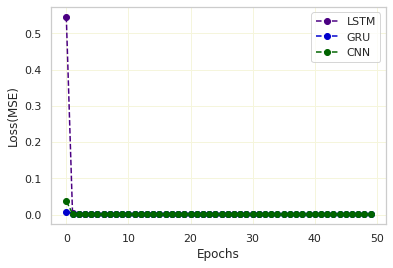

In [ ]:
loss_plot(lstm_loss.iloc[:, 1], gru_loss.iloc[:, 1], cnn_loss.iloc[:, 1])

##  **Plot 2: Average Scores Plot**



In [ ]:

#Read avg scores files
lstm_avg_scores = read_df_from_file(output_dir_path+'multiple_lstm_models_average_scores.csv')
gru_avg_scores = read_df_from_file(output_dir_path+'multiple_gru_models_average_scores.csv')
cnn_avg_scores = read_df_from_file(output_dir_path+'multiple_cnn_models_average_scores.csv')

def avg_test_scores_plot(lstm_avg_scores, gru_avg_scores, cnn_avg_scores):

  lstm_neurons = [10, 30, 50, 100, 150, 200, 250]
  gru_neurons =  [10, 30, 50, 100, 150, 200, 250]
  cnn_neurons =  [10, 30, 50, 100, 150, 200, 250]

  fig = plt.figure(figsize = (20, 5))
  plt.subplot(131)
  plt.plot(lstm_avg_scores['layers'], lstm_avg_scores['rmse'], '--o', linewidth = 2.5, color = 'indigo')
  plt.plot(gru_avg_scores['layers'], gru_avg_scores['rmse'], '--o', linewidth = 2.5, color = 'darkgreen')
  plt.plot(cnn_avg_scores['layers'], cnn_avg_scores['rmse'], '--o', linewidth = 2.5, color = 'darkred')
  plt.xticks([0,1,2,3,4,5,6], lstm_neurons)
  plt.title("(a)")
  plt.xlabel("Neurons")
  plt.ylabel("Avg. RMSE")
  plt.legend(['LSTM', 'GRU', 'CNN'],  loc = 'best')
  sns.set_style("whitegrid")

  plt.subplot(132)
  plt.plot(lstm_avg_scores['layers'], lstm_avg_scores['mape'], '--o', linewidth = 2.5, color = 'indigo')
  plt.plot(gru_avg_scores['layers'], gru_avg_scores['mape'], '--o', linewidth = 2.5, color = 'darkgreen')
  plt.plot(cnn_avg_scores['layers'], cnn_avg_scores['mape'], '--o', linewidth = 2.5, color = 'darkred')
  plt.xticks([0,1,2,3,4,5,6], lstm_neurons)
  plt.title("(b)")
  plt.xlabel("Neurons")
  plt.ylabel("Avg. MAPE")
  plt.legend(['LSTM', 'GRU', 'CNN'],  loc = 'best')
  sns.set_style("whitegrid")


  plt.subplot(133)
  plt.plot(lstm_avg_scores['layers'], lstm_avg_scores['R'], '--o', linewidth = 2.5, color = 'indigo')
  plt.plot(gru_avg_scores['layers'], gru_avg_scores['R'], '--o', linewidth = 2.5, color = 'darkgreen')
  plt.plot(cnn_avg_scores['layers'], cnn_avg_scores['R'], '--o', linewidth = 2.5, color = 'darkred')
  plt.xticks([0,1,2,3,4,5,6], lstm_neurons)
  plt.title("(c)")
  plt.xlabel("Neurons")
  plt.ylabel("Avg. R")
  plt.legend(['LSTM', 'GRU', 'CNN'],  loc = 'best')
  sns.set_style("whitegrid")

  fig.savefig(output_dir_path+"multiple_avg_scores_plots.pdf",dpi=600)
  plt.show()


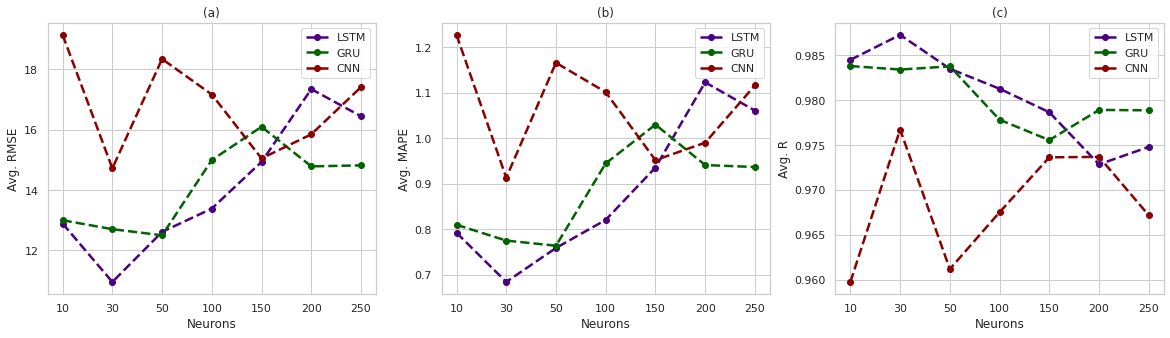

In [ ]:
avg_test_scores_plot(lstm_avg_scores, gru_avg_scores, cnn_avg_scores)

##  **Plot 3: True Vs Predicted Plots in Train and Test Data(By best LSTM, GRU, and CNN)**

In [ ]:

#Read true vs predicted values
y_train = read_df_from_file(output_dir_path+ 'y_train.csv')
y_test =  read_df_from_file(output_dir_path+ 'y_test.csv')
lstm_train_pred = read_df_from_file(output_dir_path+ 'best_lstm_model_train_predictions.csv')
lstm_test_pred = read_df_from_file(output_dir_path+ 'best_lstm_model_test_predictions.csv')
gru_train_pred = read_df_from_file(output_dir_path+ 'best_gru_model_train_predictions.csv')
gru_test_pred = read_df_from_file(output_dir_path+ 'best_gru_model_test_predictions.csv')
cnn_train_pred = read_df_from_file(output_dir_path+ 'best_cnn_model_train_predictions.csv')
cnn_test_pred  = read_df_from_file(output_dir_path+ 'best_cnn_model_test_predictions.csv')



def best_model_true_vs_prediction_plot(y_train, y_test, lstm_train_pred, lstm_test_pred, gru_train_pred, gru_test_pred, cnn_train_pred, cnn_test_pred):

  ##====== Visualizing true vs predicted plots ========#
  fig1 = plt.figure(figsize= (19,4))
  plt.subplot(131)

  plt.scatter(y_train, lstm_train_pred, marker = "+" , color ='mediumblue')
  identity_line = np.linspace(max(min(y_train), min(lstm_train_pred)), min(max(y_train), max(lstm_train_pred)))
  plt.plot(identity_line, identity_line, color="red", linestyle="dashed", linewidth=2.5)

  plt.xlabel("True")
  plt.ylabel("Predicted")
  plt.title("(a)")


  plt.subplot(132)
  #sns.relplot(x = y_train_original, y = train_pred_original)
  plt.scatter(y_train, gru_train_pred, marker = "+" , color ='mediumblue' )
  identity_line = np.linspace(max(min(y_train), min(gru_train_pred)), min(max(y_train), max(gru_train_pred)))
  plt.plot(identity_line, identity_line, color="red", linestyle="dashed", linewidth=2.5)

  plt.xlabel("True")
  plt.ylabel("Predicted")
  plt.title("(b)")

  plt.subplot(133)
  #sns.relplot(x = y_train_original, y = train_pred_original)
  plt.scatter(y_train, cnn_train_pred, marker = "+", color ='mediumblue')
  identity_line = np.linspace(max(min(y_train), min(cnn_train_pred)), min(max(y_train), max(cnn_train_pred)))
  plt.plot(identity_line, identity_line, color="red", linestyle="dashed", linewidth=2.5)

  plt.xlabel("True")
  plt.ylabel("Predicted")
  plt.title("(c)")
  fig1.savefig(output_dir_path+"true_vs_prediction_plot_train_data.pdf", dpi=600)

  ##====== Visualizing true vs predicted plots ========#
  fig2 = plt.figure(figsize= (19,4))
  plt.subplot(131)
  #sns.relplot(x = y_train_original, y = train_pred_original)
  plt.scatter(y_test, lstm_test_pred, marker = "+" , color ='mediumblue')
  identity_line = np.linspace(max(min(y_test), min(lstm_test_pred)), min(max(y_test), max(lstm_test_pred)))
  plt.plot(identity_line, identity_line, color= "red", linestyle="dashed", linewidth=2.5)
  plt.xlabel("True")
  plt.ylabel("Predicted")
  plt.title("(a)")


  plt.subplot(132)
  #sns.relplot(x = y_train_original, y = train_pred_original)
  plt.scatter(y_test, gru_test_pred, marker = "+" , color ='mediumblue' )
  identity_line = np.linspace(max(min(y_test), min(gru_test_pred)), min(max(y_test), max(gru_test_pred)))
  plt.plot(identity_line, identity_line, color="red", linestyle="dashed", linewidth=2.5)
  plt.xlabel("True")
  plt.ylabel("Predicted")
  plt.title("(b)")

  plt.subplot(133)
  #sns.relplot(x = y_train_original, y = train_pred_original)
  plt.scatter(y_test, cnn_test_pred, marker = "+" , color ='mediumblue' )
  identity_line = np.linspace(max(min(y_test), min(cnn_test_pred)), min(max(y_test), max(cnn_test_pred)))
  plt.plot(identity_line, identity_line, color="red", linestyle="dashed", linewidth=2.5)
  plt.xlabel("True")
  plt.ylabel("Predicted")
  plt.title("(c)")

  fig2.savefig(output_dir_path+ "true_vs_prediction_plot_test_data.pdf", dpi=600)
  plt.show()


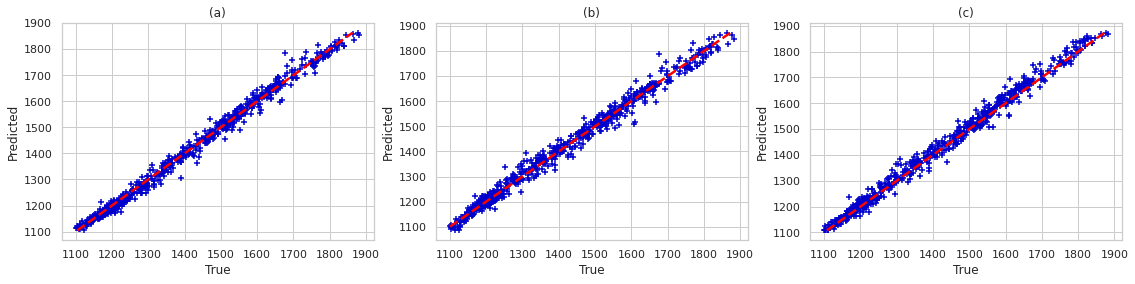

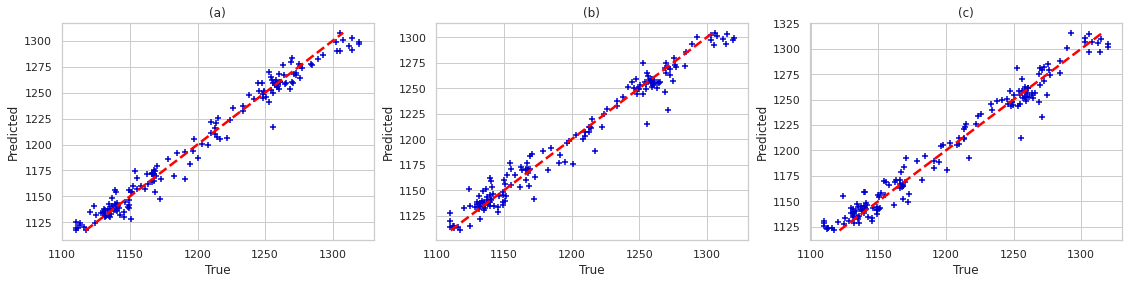

In [ ]:

#tru vs  predicted
best_model_true_vs_prediction_plot(y_train.iloc[:,1],
                                   y_test.iloc[:,1],
                                   lstm_train_pred.iloc[:,1],
                                   lstm_test_pred.iloc[:,1],
                                   gru_train_pred.iloc[:,1],
                                   gru_test_pred.iloc[:,1],
                                   cnn_train_pred.iloc[:,1],
                                   cnn_test_pred.iloc[:,1])


## **Plot 4: Prediction Plots Given by Best LSTM, GRU, CNN Models**

In [ ]:


def best_model_prediction_plot(time_step, data, y_train, y_test, lstm_train_pred, lstm_test_pred, gru_train_pred, gru_test_pred, cnn_train_pred, cnn_test_pred):

  train_predict_plot_data = np.empty_like(data.values[:,0])# extracting closing price
  train_predict_plot_data[:] = np.nan

  test_predict_plot_data = np.empty_like(data.values[:,0])
  test_predict_plot_data[:] = np.nan


  fig1 = plt.figure(figsize = (19,5))

  plt.subplot(131)

  train_predict_plot_data[time_step:len(lstm_train_pred)+ time_step] =  lstm_train_pred
  test_predict_plot_data[len(lstm_train_pred)+(time_step*2)+1:len(data.values)-1] = lstm_test_pred

  plt.plot(data.values[:,0],'k', linewidth = 1.5)
  plt.plot(train_predict_plot_data,'mediumblue',linewidth = 1.5)
  plt.plot(test_predict_plot_data,'darkgreen',linewidth = 1.5)
  plt.xlabel('')
  plt.ylabel('Close price')
  plt.title("(a)")
  plt.legend(['True value', 'Predicted value in train set', 'Predicted value in test set'], loc='upper right')


  plt.subplot(132)

  train_predict_plot_data[time_step:len(gru_train_pred)+ time_step] =  gru_train_pred
  test_predict_plot_data[len(gru_train_pred)+(time_step*2)+1:len(data.values)-1] = gru_test_pred

  plt.plot(data.values[:,0],'k', linewidth = 1.5)
  plt.plot(train_predict_plot_data,'mediumblue',linewidth = 1.5)
  plt.plot(test_predict_plot_data,'darkgreen',linewidth = 1.5)
  plt.xlabel('')
  plt.ylabel('Close price')
  plt.title("(b)")
  plt.legend(['True value', 'Predicted value in train set', 'Predicted value in test set'], loc='upper right')


  plt.subplot(133)

  train_predict_plot_data[time_step:len(cnn_train_pred)+ time_step] =  cnn_train_pred
  test_predict_plot_data[len(cnn_train_pred)+(time_step*2)+1:len(data.values)-1] = cnn_test_pred

  plt.plot(data.values[:,0],'k', linewidth = 1.5)
  plt.plot(train_predict_plot_data,'mediumblue',linewidth = 1.5)
  plt.plot(test_predict_plot_data,'darkgreen',linewidth = 1.5)
  plt.xlabel('')
  plt.ylabel('Close price')
  plt.title("(c)")
  plt.legend(['True value', 'Predicted value in train set', 'Predicted value in test set'], loc='upper right')

  fig1.savefig(output_dir_path+"best_model_predictions_plots_full_data.pdf",dpi=600)



  fig2 = plt.figure(figsize = (19,5))

  plt.subplot(131)
  plt.plot(data.values[len(lstm_train_pred)+(time_step*2)+1:-1, 0],'k',linewidth = 1.5)
  plt.plot(lstm_test_pred,'darkgreen',linewidth = 1.5)
  plt.xlabel('')
  plt.ylabel('Close price')
  plt.title("(a)")
  plt.legend(['True value', 'Predicted value'], loc='upper right')

  plt.subplot(132)
  plt.plot(data.values[len(gru_train_pred)+(time_step*2)+1:-1, 0],'k',linewidth = 1.5)
  plt.plot(gru_test_pred,'darkgreen',linewidth = 1.5)
  plt.xlabel('')
  plt.ylabel('Close price')
  plt.title("(b)")
  plt.legend(['True value', 'Predicted value'], loc='upper right')

  plt.subplot(133)
  plt.plot(data.values[len(cnn_train_pred)+(time_step*2)+1:-1, 0],'k',linewidth = 1.5)
  plt.plot(cnn_test_pred,'darkgreen',linewidth = 1.5)
  plt.xlabel('')
  plt.ylabel('Close price')
  plt.title("(c)")
  plt.legend(['True value', 'Predicted value'], loc='upper right')

  fig2.savefig(output_dir_path+"best_model_predictions_plots_test_data.pdf",dpi=600)

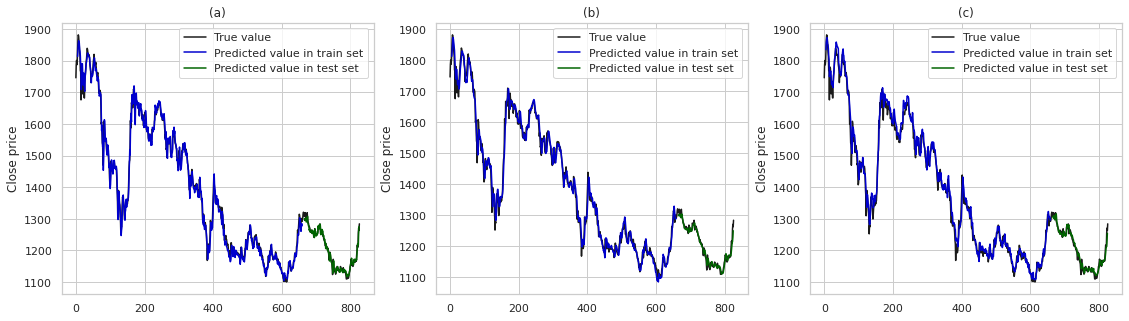

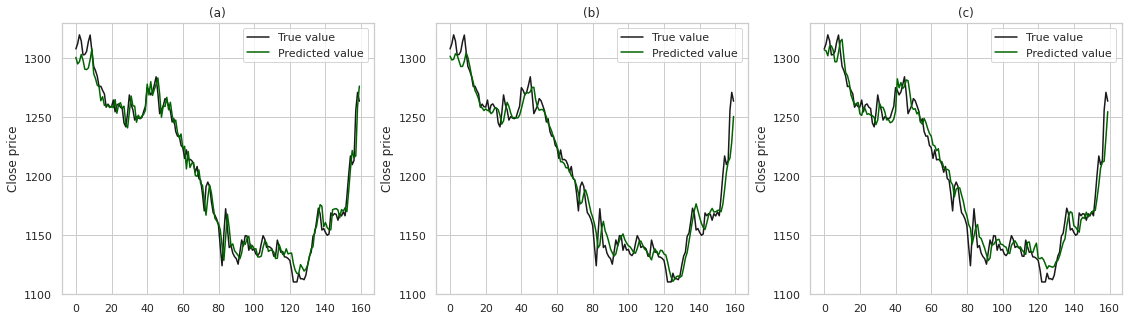

In [ ]:

best_model_prediction_plot( 5, data,
                                   y_train.iloc[:,1],
                                   y_test.iloc[:,1],
                                   lstm_train_pred.iloc[:,1],
                                   lstm_test_pred.iloc[:,1],
                                   gru_train_pred.iloc[:,1],
                                   gru_test_pred.iloc[:,1],
                                   cnn_train_pred.iloc[:,1],
                                   cnn_test_pred.iloc[:,1])


## **Plot 5: Comparative RMSE Boxplots of Best LSTM,GRU, and CNN**

In [ ]:


#Read best rmse files
best_lstm_rmse = read_df_from_file(output_dir_path+ 'best_lstm_model_all_rmse.csv')
best_gru_rmse = read_df_from_file(output_dir_path+ 'best_gru_model_all_rmse.csv')
best_cnn_rmse = read_df_from_file(output_dir_path+ 'best_cnn_model_all_rmse.csv')

def best_model_comparative_rmse_boxplots(lstm_rmse, gru_rmse, cnn_rmse):
  data = pd.DataFrame()
  data['LSTM'] = lstm_rmse
  data['GRU'] = gru_rmse
  data['CNN'] = cnn_rmse
  fig = plt.figure(figsize = (8,4))
  p = plt.boxplot(data.T, patch_artist= True)
  colors = ['mediumblue', 'darkred', 'darkgreen']
  for i, box in enumerate(p['boxes']):
    box.set(color= 'blue', linewidth = 1.2)
    # change fill color
    box.set(facecolor = colors[i])
  plt.xticks([1,2, 3], ['LSTM','GRU', 'CNN'])
  plt.ylabel('RMSE')
  fig.savefig(output_dir_path+"comparative_rmse_boxplots.pdf",dpi=600)
  plt.show()


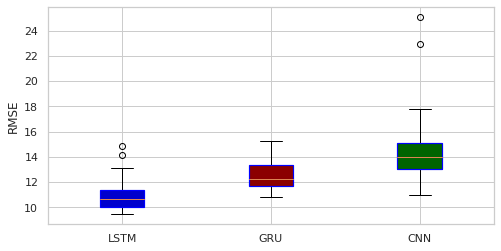

In [ ]:
best_model_comparative_rmse_boxplots(best_lstm_rmse.iloc[:,1], best_gru_rmse.iloc[:,1], best_cnn_rmse.iloc[:,1])


## **Plot 6: Statistical Analysis**

In [ ]:

import scipy

def perform_normality_test(lstm_rmse, gru_rmse, cnn_rmse):
  print("Performaing Normality Tests\n")
  print("lstm_rmse: ")
  print(scipy.stats.normaltest(lstm_rmse))
  print("gru_rmse:")
  print(scipy.stats.normaltest(gru_rmse))
  print("cnn_rmse:")
  print(scipy.stats.normaltest(cnn_rmse))

def perform_pairwise_ttests(lstm_rmse, gru_rmse, cnn_rmse):

  print("\n Two-sample ttest between lstm_rmse and  gru_rmse")
  print(scipy.stats.ttest_ind(lstm_rmse, gru_rmse, equal_var = False))  # It does not require variences to be equal.

  print("\n Two-sample ttest between lstm_rmse and  cnn_rmse")
  print(scipy.stats.ttest_ind(lstm_rmse, cnn_rmse, equal_var = False))  # It does not require variences to be equal.

  print("\n Two-sample ttest between gru_rmse and  cnn_rmse")
  print(scipy.stats.ttest_ind(gru_rmse, cnn_rmse, equal_var = False))  # It does not require variences to be equal.



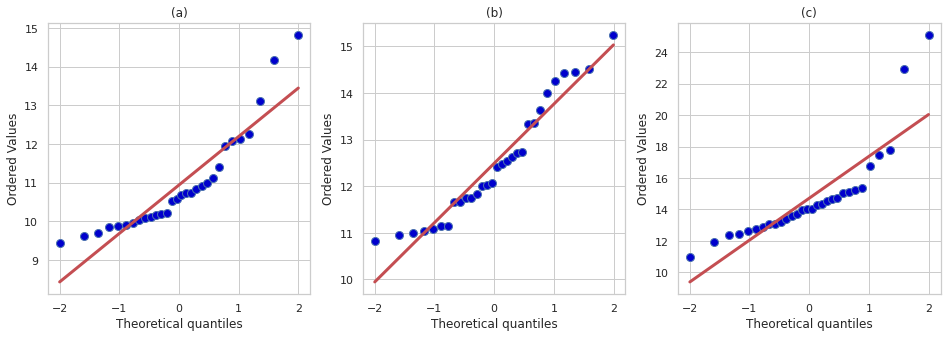

Performaing Normality Tests

lstm_rmse: 
NormaltestResult(statistic=13.741670089062595, pvalue=0.0010376102519855856)
gru_rmse:
NormaltestResult(statistic=2.880213015354451, pvalue=0.2369025254006672)
cnn_rmse:
NormaltestResult(statistic=27.757637802360215, pvalue=9.386540014696607e-07)

 Two-sample ttest between lstm_rmse and  gru_rmse
Ttest_indResult(statistic=-4.657525270713421, pvalue=1.9170879154787454e-05)

 Two-sample ttest between lstm_rmse and  cnn_rmse
Ttest_indResult(statistic=-6.372602974008573, pvalue=1.4179911297196252e-07)

 Two-sample ttest between gru_rmse and  cnn_rmse
Ttest_indResult(statistic=-3.7796924583794516, pvalue=0.0005235678450717695)


In [ ]:

comparative_qq_plots(best_lstm_rmse.iloc[:,1], best_gru_rmse.iloc[:,1], best_cnn_rmse.iloc[:,1])
perform_normality_test(best_lstm_rmse.iloc[:,1], best_gru_rmse.iloc[:,1], best_cnn_rmse.iloc[:,1])
perform_pairwise_ttests(best_lstm_rmse.iloc[:,1], best_gru_rmse.iloc[:,1], best_cnn_rmse.iloc[:,1])